# Diabetes Prediction Project Using Machine Learning

### Description:

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

#### Early Signs of Diabetes:

- Hunger and fatigue. Our body converts the food we eat into glucose that our cells use for energy.
- Peeing more often and being thirstier
- Dry mouth and itchy skin
- Blurred vision

### Objective: 

The objective of this project is to predict whether or not a patient is suffering from Diabetes. The dataset consists of several independent/ predictor variables and a dependent/ target variable.

### Predictor variables:  

Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

### Target variable: 

Outcome

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, roc_auc_score

new_palette = ['dodgerblue', 'orange', 'green']
sns.set_palette(new_palette)

### Loading the Dataset

In [2]:
diab_data = pd.read_csv("C:/Users/aksha/Downloads/AD Projects/archive/diabetes.csv")

## Exploratory Data Analysis (EDA)

In [3]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2299,10,101,76,48,180,32.9,0.171,63,0
2300,2,122,70,27,0,36.8,0.340,27,0
2301,5,121,72,23,112,26.2,0.245,30,0
2302,1,126,60,0,0,30.1,0.349,47,1
2303,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# diab_data.sample(n=10)
diab_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1392,2,108,64,0,0,30.8,0.158,21,0
119,4,99,76,15,51,23.2,0.223,21,0
666,4,145,82,18,0,32.5,0.235,70,1
130,4,173,70,14,168,29.7,0.361,33,1
1959,2,115,64,22,0,30.8,0.421,21,0
1655,4,99,76,15,51,23.2,0.223,21,0
1154,5,116,74,29,0,32.3,0.660,35,1
1512,13,153,88,37,140,40.6,1.174,39,0
1292,3,125,58,0,0,31.6,0.151,24,0
1490,1,149,68,29,127,29.3,0.349,42,1


In [6]:
diab_data.shape

(2304, 9)

### Size of the Dataset

In [7]:
print("Number of Rows: ", diab_data.shape[0])
print("\nNumber of Columns: ", diab_data.shape[1])

Number of Rows:  2304

Number of Columns:  9


In [8]:
diab_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2304 non-null   int64  
 1   Glucose                   2304 non-null   int64  
 2   BloodPressure             2304 non-null   int64  
 3   SkinThickness             2304 non-null   int64  
 4   Insulin                   2304 non-null   int64  
 5   BMI                       2304 non-null   float64
 6   DiabetesPedigreeFunction  2304 non-null   float64
 7   Age                       2304 non-null   int64  
 8   Outcome                   2304 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 162.1 KB


### Summary of the dataset

In [10]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.368115,31.958732,19.347401,15.945289,115.193951,7.880736,0.331185,11.755124,0.476744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [11]:
diab_data.shape

(2304, 9)

In [12]:
df = diab_data.drop_duplicates()

In [13]:
df.shape

(768, 9)

### Checking for Null Values

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking for the number of zero values in the dataset

In [18]:
col_headers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in col_headers:
    print(f"Number of zero values in {col}:", df[df[col]==0].shape[0])

Number of zero values in Glucose: 5
Number of zero values in BloodPressure: 35
Number of zero values in SkinThickness: 227
Number of zero values in Insulin: 374
Number of zero values in BMI: 11


### Outlier Detection

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

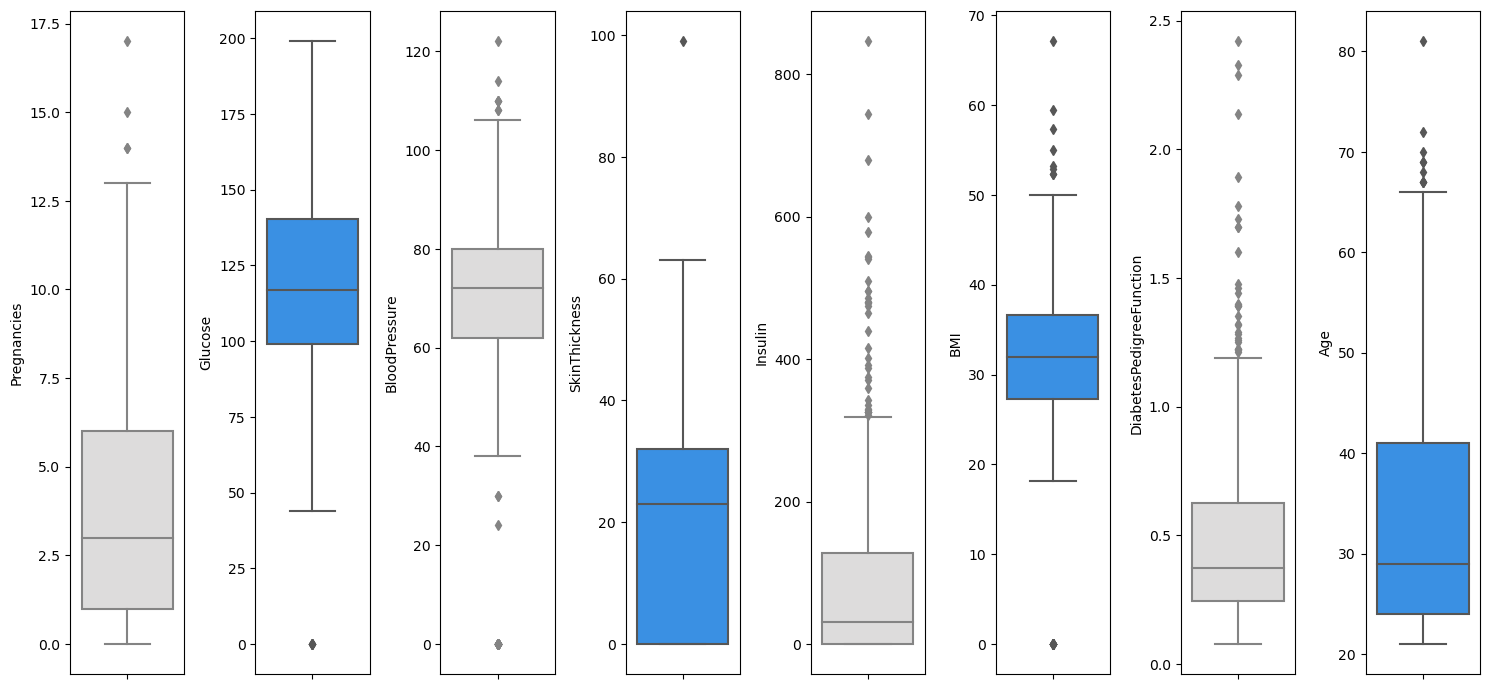

In [20]:
plt.rcParams['figure.figsize']=(15,7)
f,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8)
sns.boxplot(y = 'Pregnancies', data=df, ax=ax1, palette = 'coolwarm')
sns.boxplot(y = 'Glucose', data=df, ax=ax2)
sns.boxplot(y = 'BloodPressure', data=df, ax=ax3, palette = 'coolwarm')
sns.boxplot(y = 'SkinThickness', data=df, ax=ax4)
sns.boxplot(y = 'Insulin', data=df, ax=ax5, palette = 'coolwarm')
sns.boxplot(y = 'BMI', data=df, ax=ax6)
sns.boxplot(y = 'DiabetesPedigreeFunction', data=df, ax=ax7, palette = 'coolwarm')
sns.boxplot(y = 'Age', data=df, ax=ax8)
f.tight_layout()

In [21]:
IQR = df['Pregnancies'].quantile(0.75) - df['Pregnancies'].quantile(0.25)
Lower_Limit = df['Pregnancies'].quantile(0.25) - (IQR * 1.5)
Upper_Limit = df['Pregnancies'].quantile(0.75) + (IQR * 1.5)
print(f'Pregnancies outliers lies below {Lower_Limit} and above {Upper_Limit}')

Pregnancies outliers lies below -6.5 and above 13.5


In [22]:
IQR = df['Glucose'].quantile(0.75) - df['Glucose'].quantile(0.25)
Lower_Limit = df['Glucose'].quantile(0.25) - (IQR * 1.5)
Upper_Limit = df['Glucose'].quantile(0.75) + (IQR * 1.5)
print(f'Glucose outliers lies below {Lower_Limit} and above {Upper_Limit}')

Glucose outliers lies below 37.125 and above 202.125


In [23]:
IQR = df['BloodPressure'].quantile(0.75) - df['BloodPressure'].quantile(0.25)
Lower_Limit = df['BloodPressure'].quantile(0.25) - (IQR * 1.5)
Upper_Limit = df['BloodPressure'].quantile(0.75) + (IQR * 1.5)
print(f'BloodPressure outliers lies below {Lower_Limit} and above {Upper_Limit}')

BloodPressure outliers lies below 35.0 and above 107.0


In [24]:
IQR = df['SkinThickness'].quantile(0.75) - df['SkinThickness'].quantile(0.25)
Lower_Limit = df['SkinThickness'].quantile(0.25) - (IQR * 1.5)
Upper_Limit = df['SkinThickness'].quantile(0.75) + (IQR * 1.5)
print(f'SkinThickness outliers lies below {Lower_Limit} and above {Upper_Limit}')

SkinThickness outliers lies below -48.0 and above 80.0


In [25]:
IQR = df['Insulin'].quantile(0.75) - df['Insulin'].quantile(0.25)
Lower_Limit = df['Insulin'].quantile(0.25) - (IQR * 1.5)
Upper_Limit = df['Insulin'].quantile(0.75) + (IQR * 1.5)
print(f'Insulin outliers lies below {Lower_Limit} and above {Upper_Limit}')

Insulin outliers lies below -190.875 and above 318.125


In [26]:
IQR = df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25)
Lower_Limit = df['BMI'].quantile(0.25) - (IQR * 1.5)
Upper_Limit = df['BMI'].quantile(0.75) + (IQR * 1.5)
print(f'BMI outliers lies below {Lower_Limit} and above {Upper_Limit}')

BMI outliers lies below 13.35 and above 50.550000000000004


In [27]:
IQR = df['DiabetesPedigreeFunction'].quantile(0.75) - df['DiabetesPedigreeFunction'].quantile(0.25)
Lower_Limit = df['DiabetesPedigreeFunction'].quantile(0.25) - (IQR * 1.5)
Upper_Limit = df['DiabetesPedigreeFunction'].quantile(0.75) + (IQR * 1.5)
print(f'DiabetesPedigreeFunction outliers lies below {Lower_Limit} and above {Upper_Limit}')

DiabetesPedigreeFunction outliers lies below -0.32999999999999996 and above 1.2


In [28]:
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
Lower_Limit = df['Age'].quantile(0.25) - (IQR * 1.5)
Upper_Limit = df['Age'].quantile(0.75) + (IQR * 1.5)
print(f'Age outliers lies below {Lower_Limit} and above {Upper_Limit}')

Age outliers lies below -1.5 and above 66.5


### Replacing with mean values in the dataset

In [29]:
# data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
# data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
# data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
# data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
# data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

col_headers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in col_headers:
    df[col].replace(0, df[col].mean(), inplace=True)

In [30]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

### Bar Plots

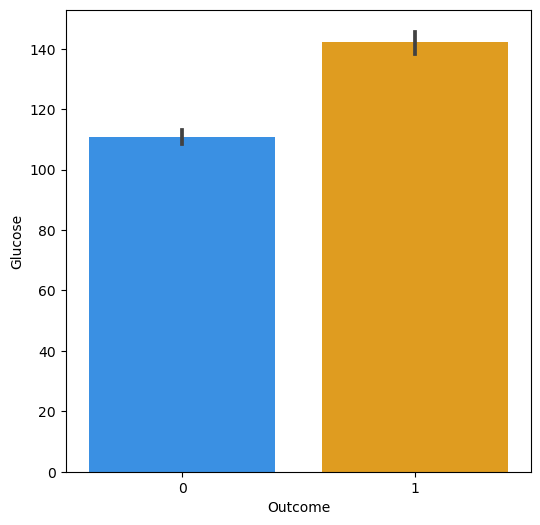

In [32]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='Glucose', data=df)
plt.show()

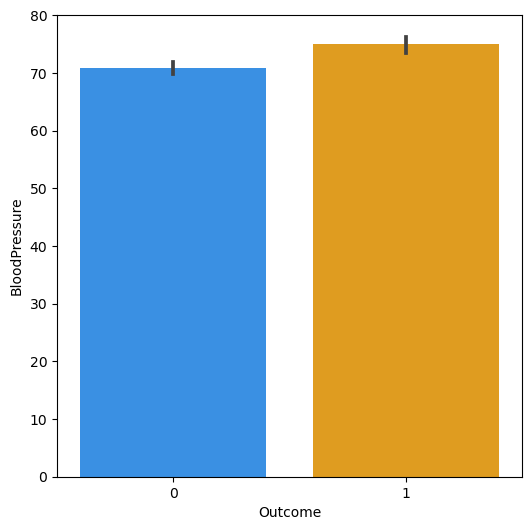

In [33]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='BloodPressure', data=df)
plt.show()

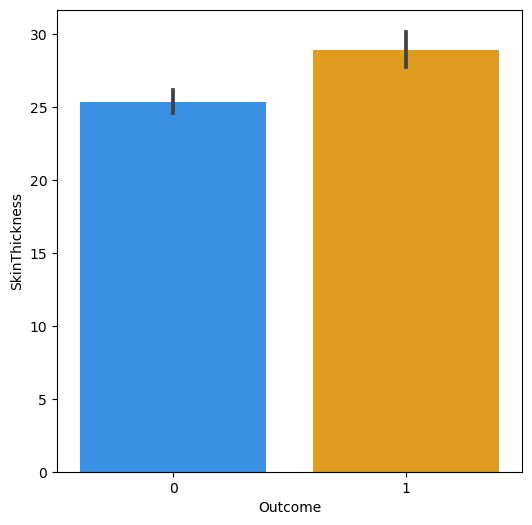

In [34]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='SkinThickness', data=df)
plt.show()

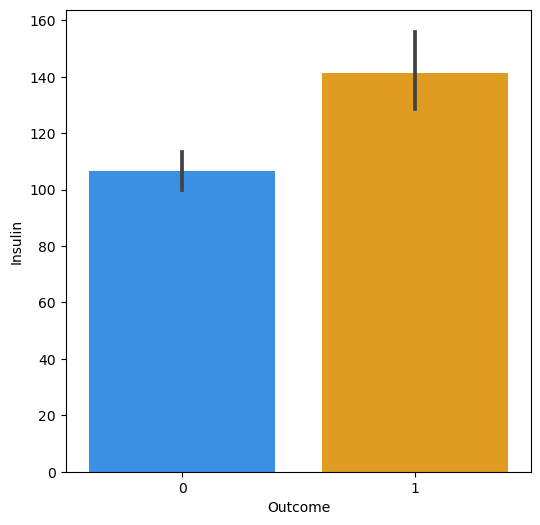

In [35]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='Insulin', data=df)
plt.show()

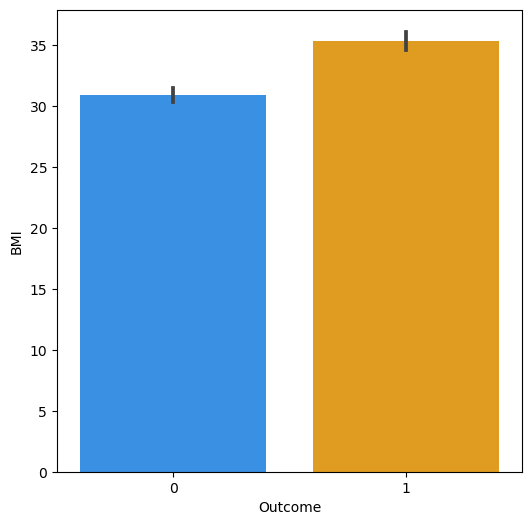

In [36]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome', y='BMI', data=df)
plt.show()

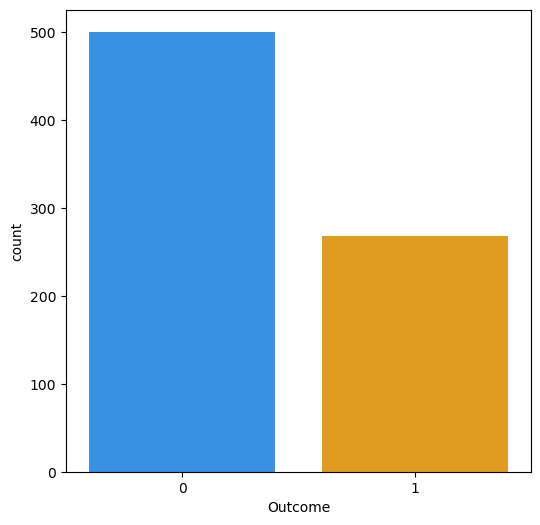

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outcome', data=df)
plt.show()

### Histograms

In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
new_palette = ['blue', 'green']
sns.set_palette(new_palette)

Text(0.5, 0, 'Insulin')

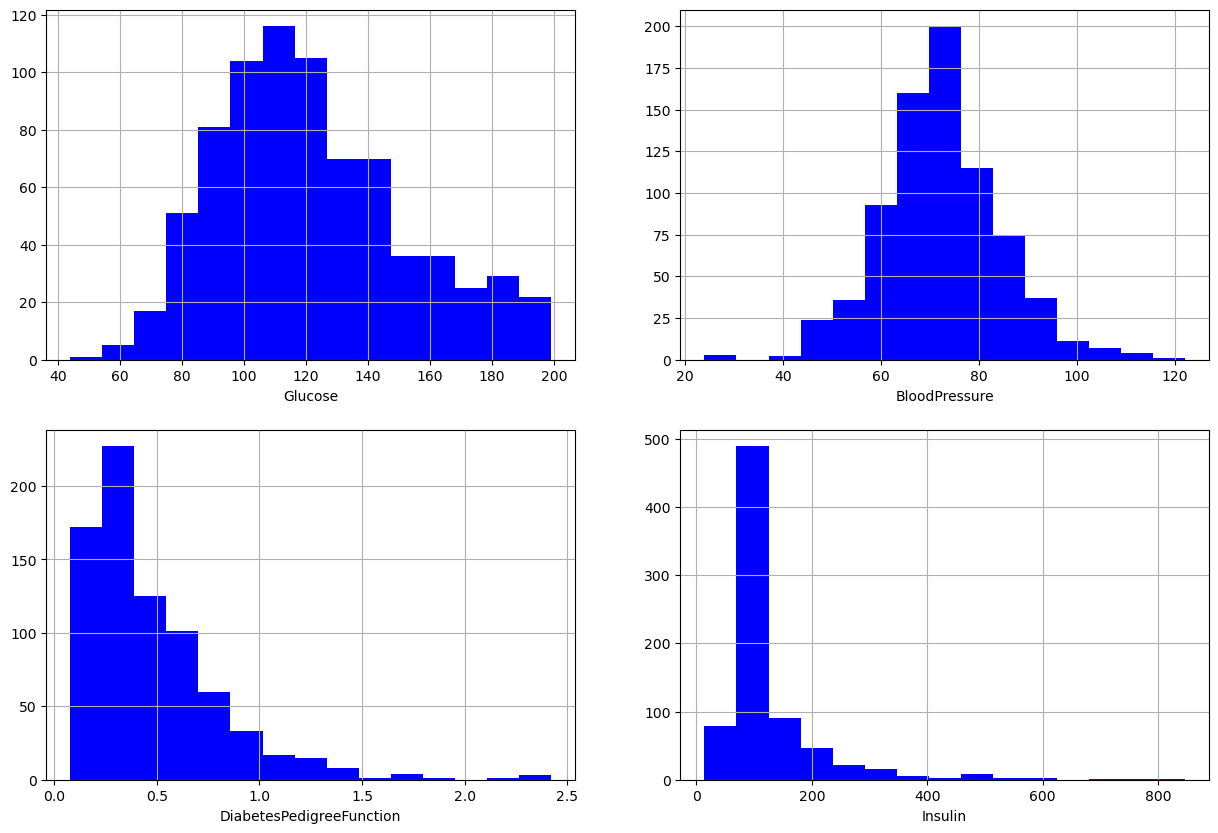

In [40]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df['Glucose'].hist(bins=15)
fig.set_xlabel('Glucose')

plt.subplot(2, 2, 2)
fig = df['BloodPressure'].hist(bins=15)
fig.set_xlabel('BloodPressure')

plt.subplot(2, 2, 3)
fig = df['DiabetesPedigreeFunction'].hist(bins=15)
fig.set_xlabel('DiabetesPedigreeFunction')

plt.subplot(2, 2, 4)
fig = df['Insulin'].hist(bins=15)
fig.set_xlabel('Insulin')

Text(0.5, 0, 'BMI')

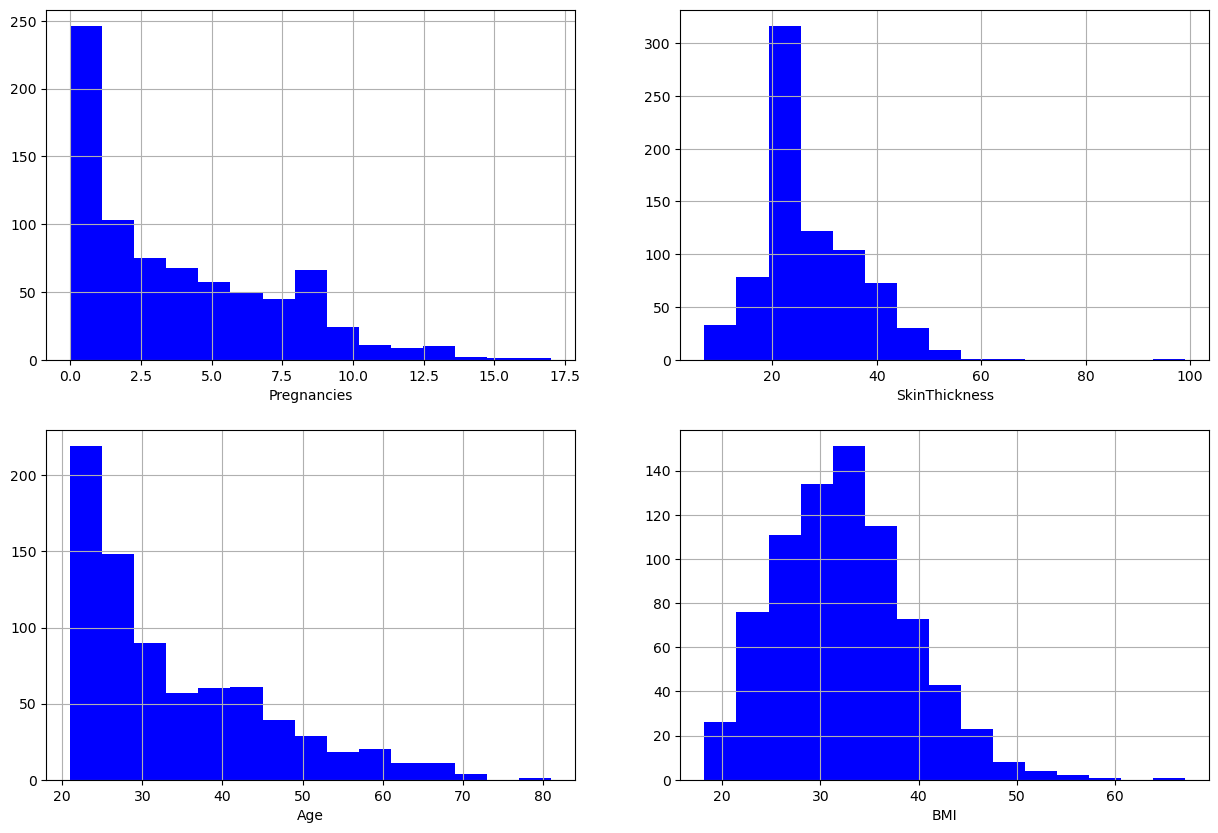

In [41]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df['Pregnancies'].hist(bins=15)
fig.set_xlabel('Pregnancies')

plt.subplot(2, 2, 2)
fig = df['SkinThickness'].hist(bins=15)
fig.set_xlabel('SkinThickness')

plt.subplot(2, 2, 3)
fig = df['Age'].hist(bins=15)
fig.set_xlabel('Age')

plt.subplot(2, 2, 4)
fig = df['BMI'].hist(bins=15)
fig.set_xlabel('BMI')

### Scatter Plots

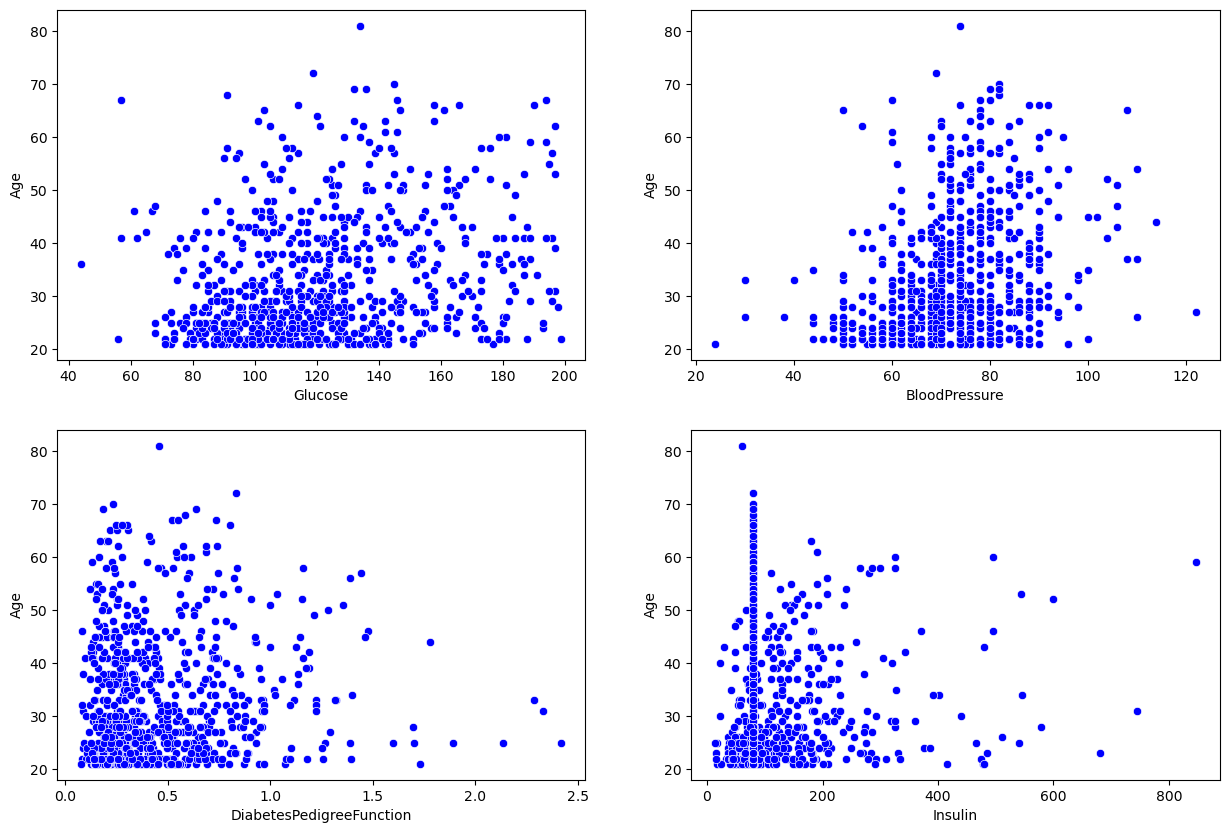

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.scatterplot(x='Glucose', y='Age', data=df)

plt.subplot(2, 2, 2)
fig = sns.scatterplot(x='BloodPressure', y='Age', data=df)

plt.subplot(2, 2, 3)
fig = sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', data=df)

plt.subplot(2, 2, 4)
fig = sns.scatterplot(x='Insulin', y='Age', data=df)

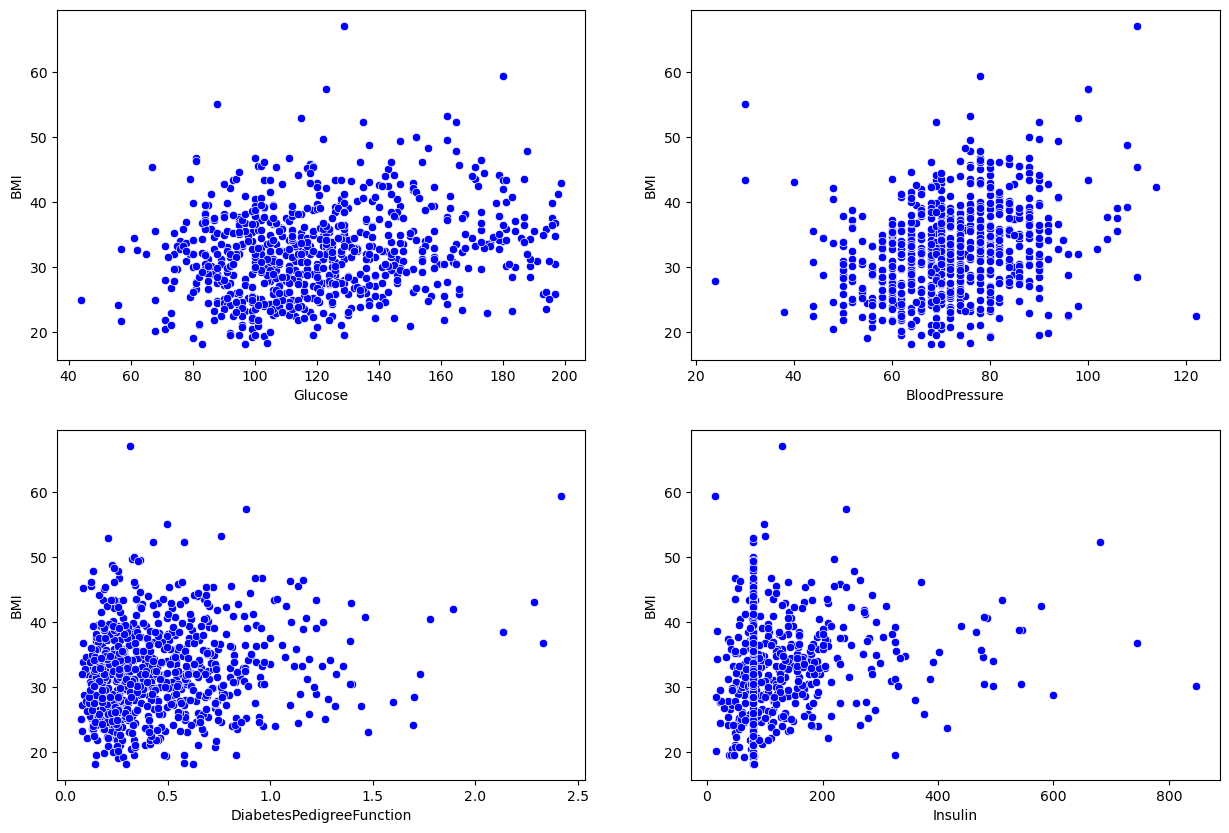

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.scatterplot(x='Glucose', y='BMI', data=df)

plt.subplot(2, 2, 2)
fig = sns.scatterplot(x='BloodPressure', y='BMI', data=df)

plt.subplot(2, 2, 3)
fig = sns.scatterplot(x='DiabetesPedigreeFunction', y='BMI', data=df)

plt.subplot(2, 2, 4)
fig = sns.scatterplot(x='Insulin', y='BMI', data=df)

### Scatter Matrix

In [44]:
new_palette = ['red', 'green']
sns.set_palette(new_palette)

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

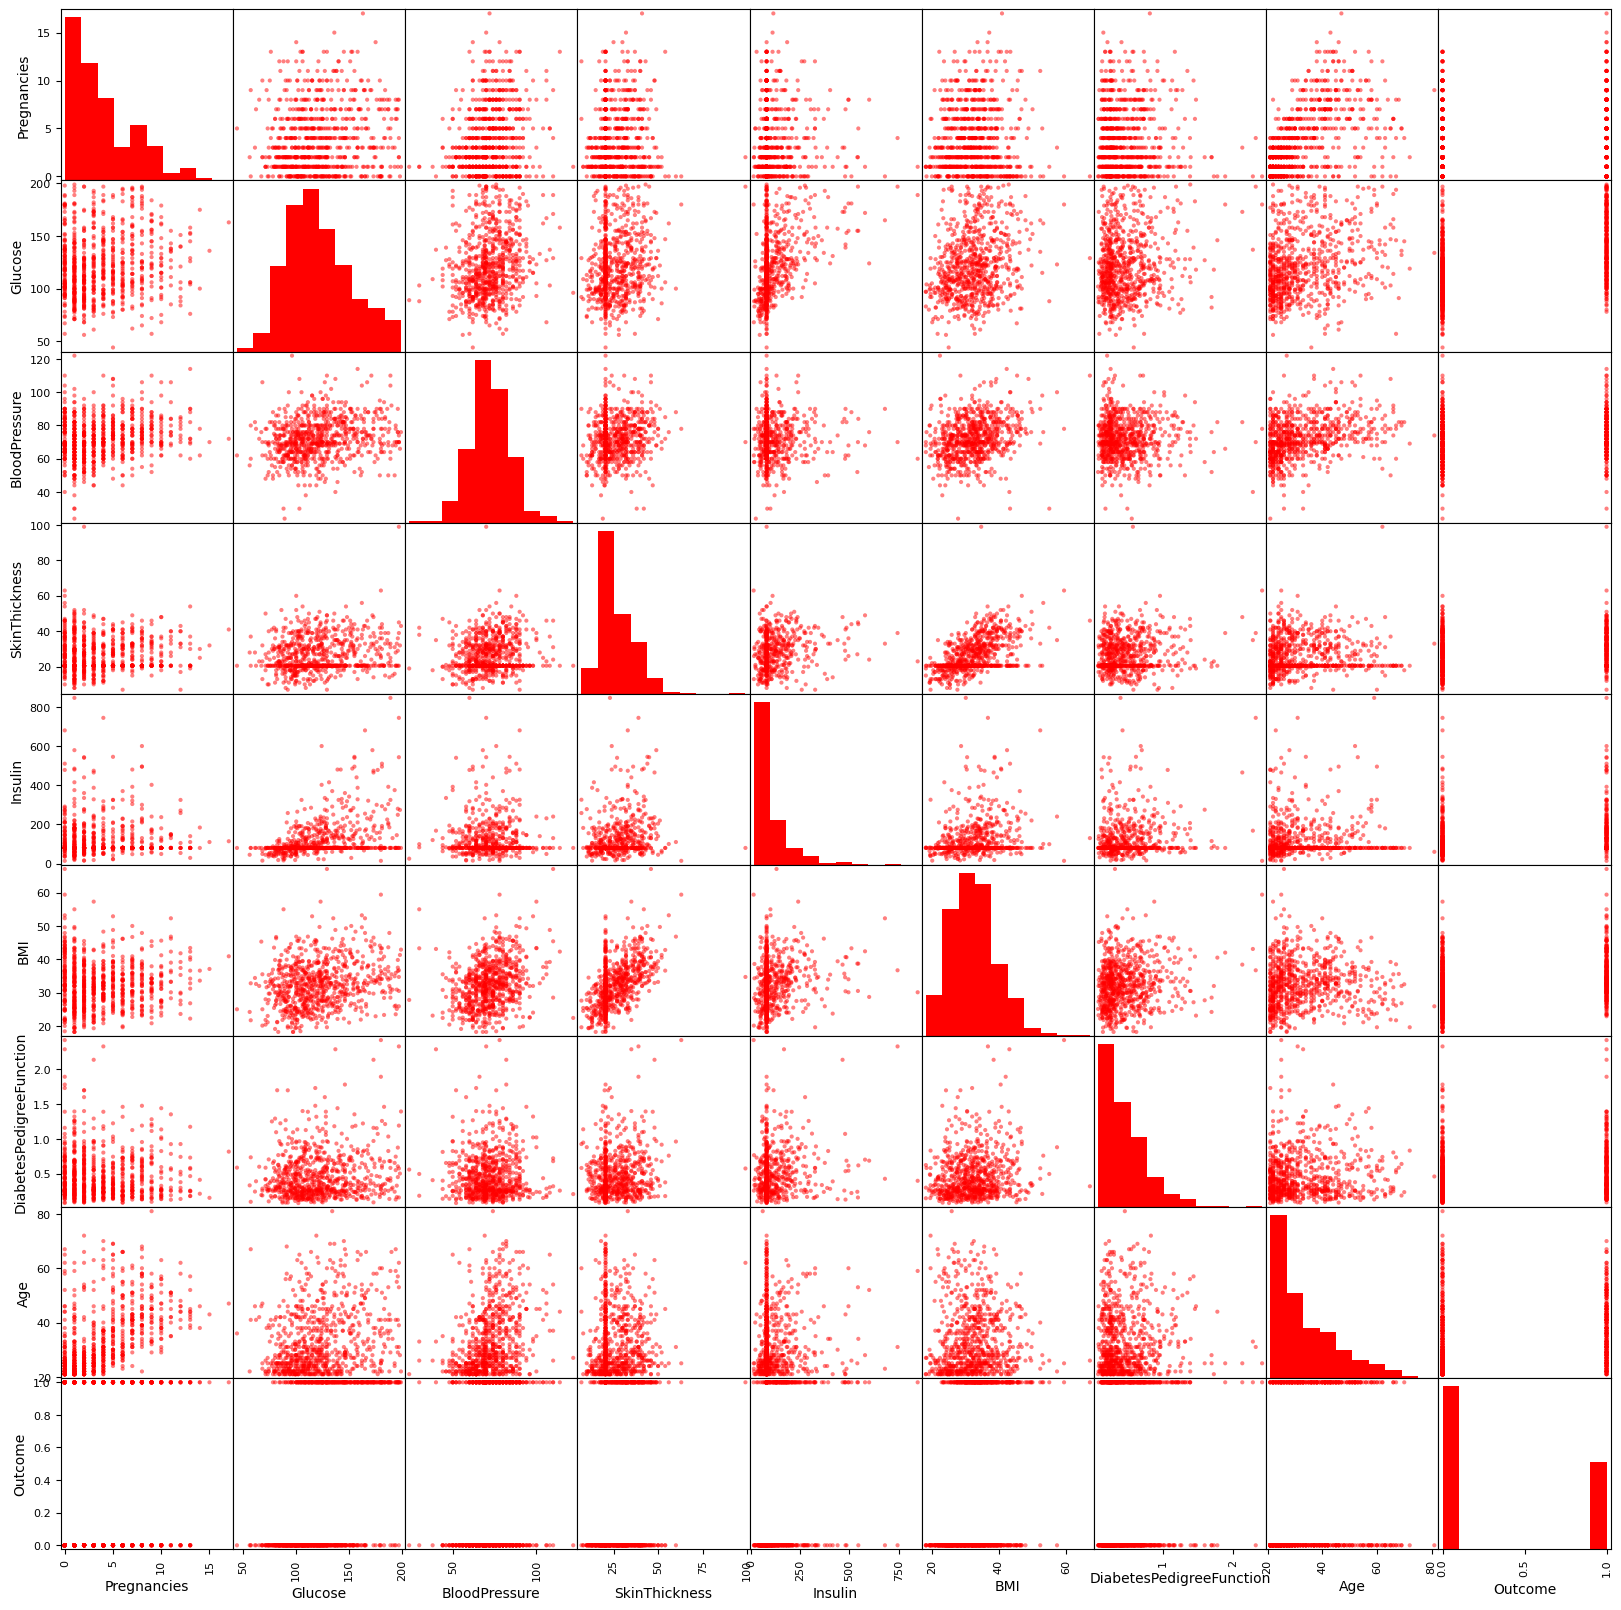

In [45]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20))

### Pair Plot

<Figure size 2000x2000 with 0 Axes>

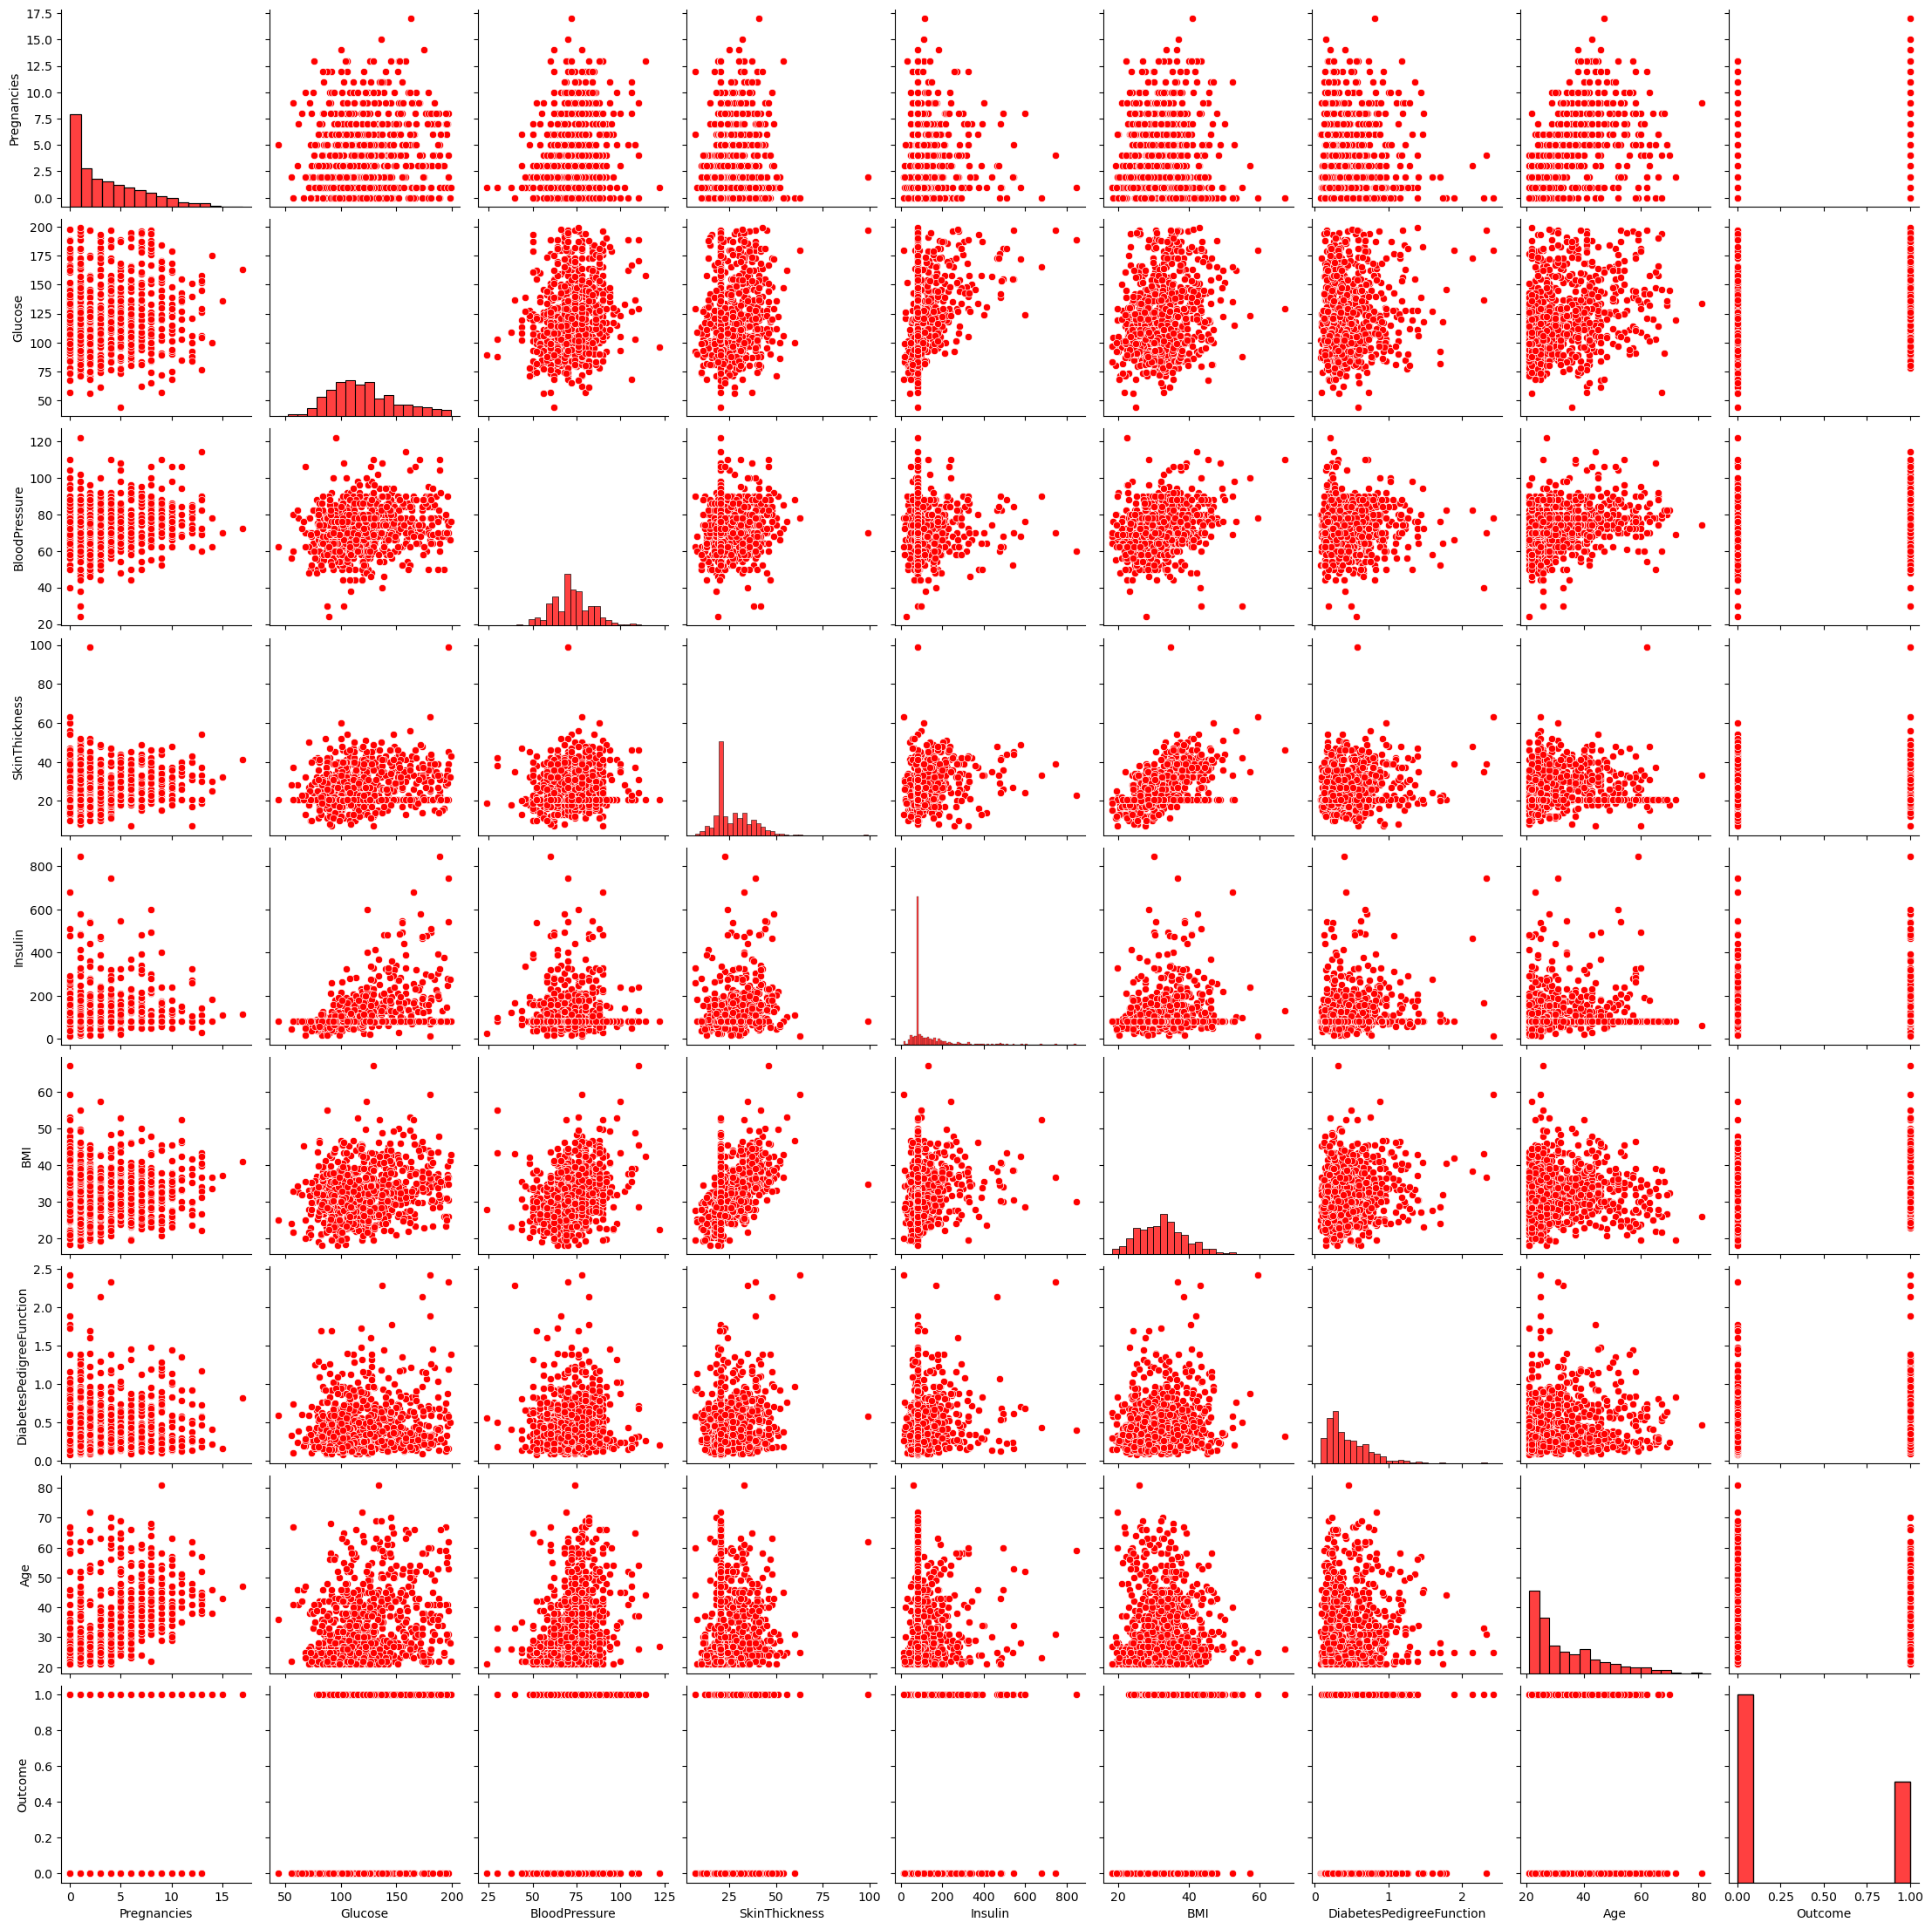

In [46]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

### Checking for Correlation between variables

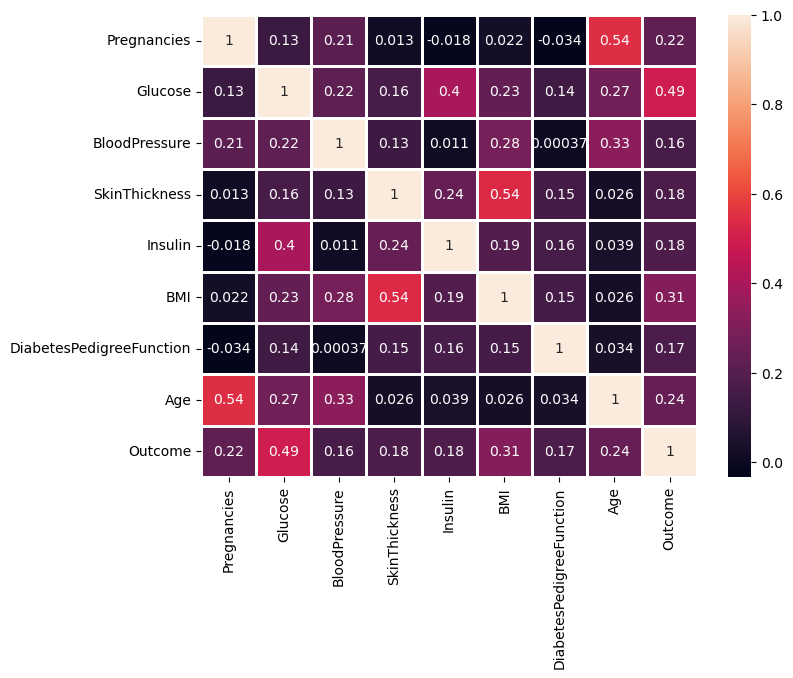

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, linewidths=2)
plt.show()

####  From the above heatmap, we can see that there is a high correlation between:

- Pregnancies & Age
- BMI & Skin Thickness
- Glucose & Outcome

### Pie Chart

array([<Axes: ylabel='Outcome'>], dtype=object)

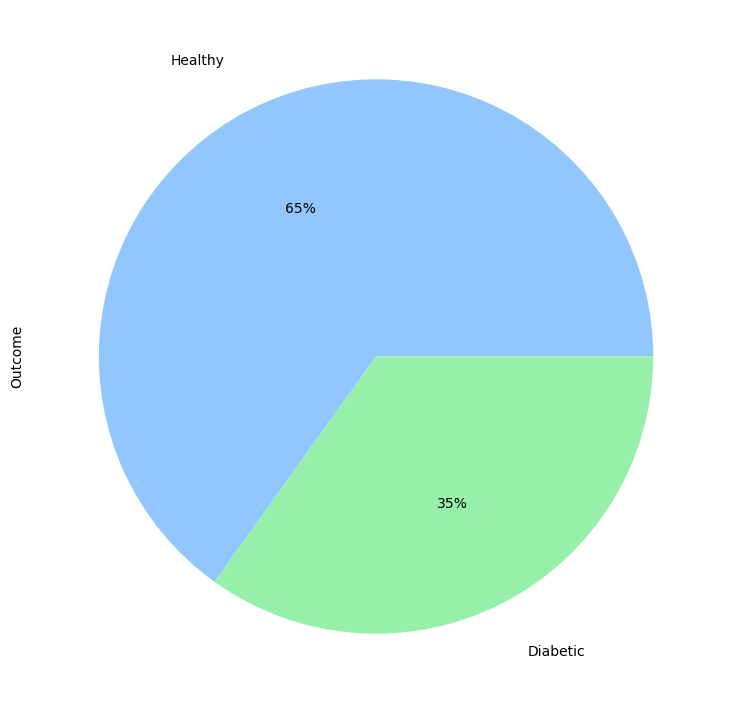

In [48]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

### Count Plot

Samples of diabetic people:  268
Samples of healthy people:  500


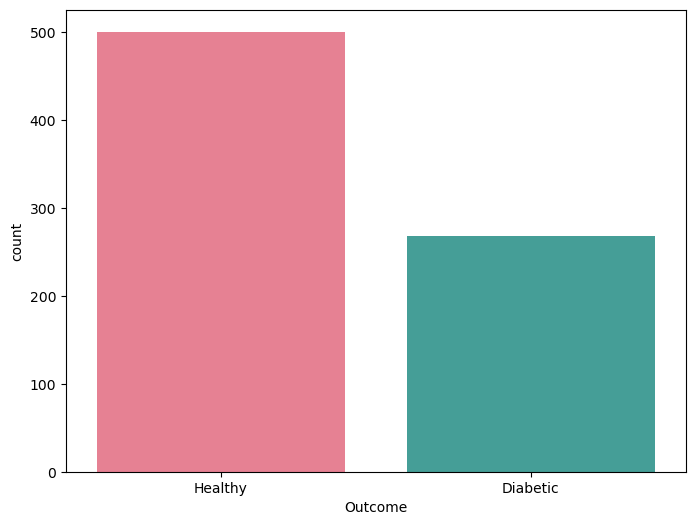

In [49]:
from matplotlib.pyplot import figure, show

figure(figsize=(8,6))
ax = sns.countplot(x=df['Outcome'], data=df,palette="husl")
ax.set_xticklabels(["Healthy","Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values
print("Samples of diabetic people: ", diabetics)
print("Samples of healthy people: ", healthy)

## Distribution of Features w.r.t the Outcome

### 1) Distribution of Pregnancies

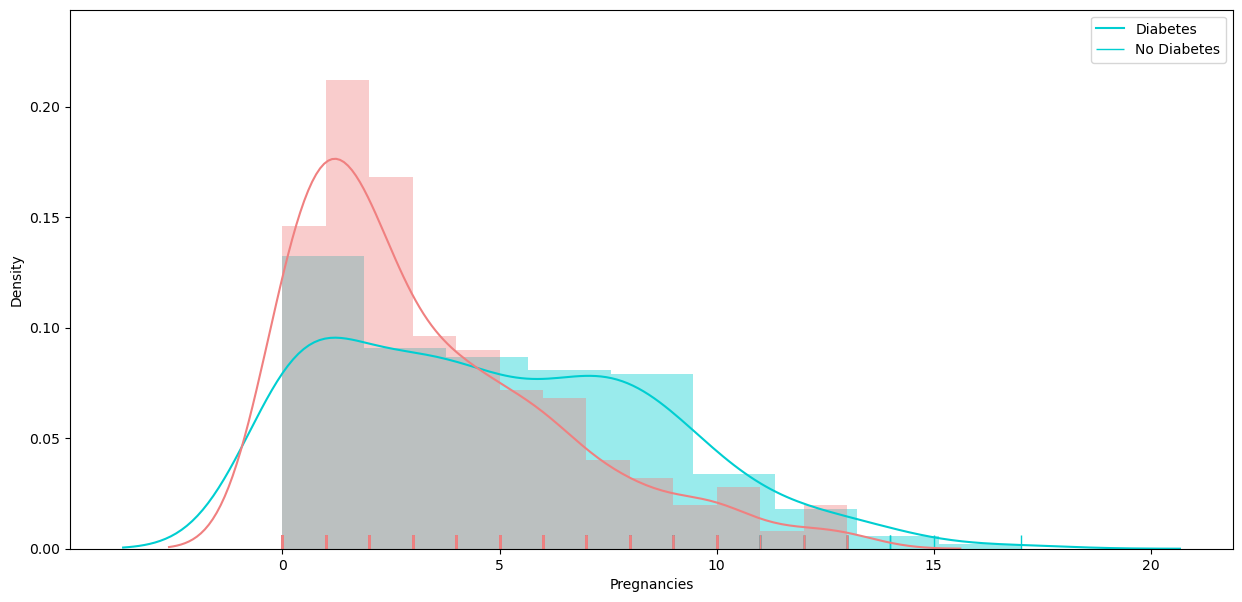

In [50]:
plt.figure()
ax = sns.distplot(df['Pregnancies'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Pregnancies'][df.Outcome == 0], color ="lightcoral",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

### 2) Distribution of Glucose

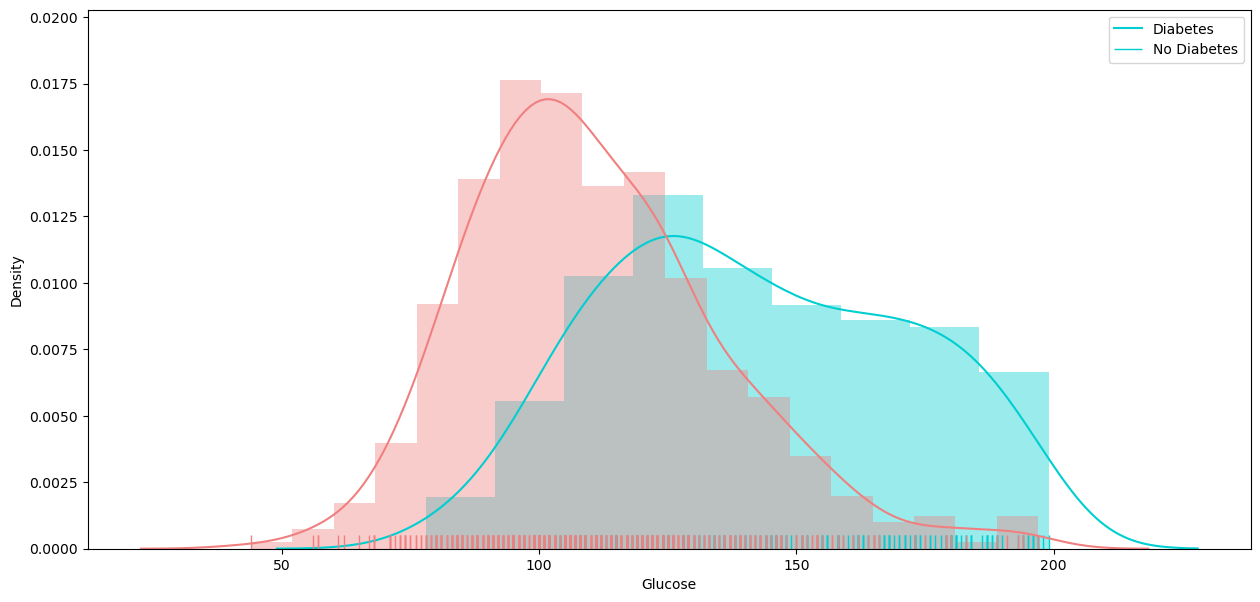

In [51]:
plt.figure()
ax = sns.distplot(df['Glucose'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Glucose'][df.Outcome == 0], color ="lightcoral", rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

### 3) Distribution of Blood Pressure

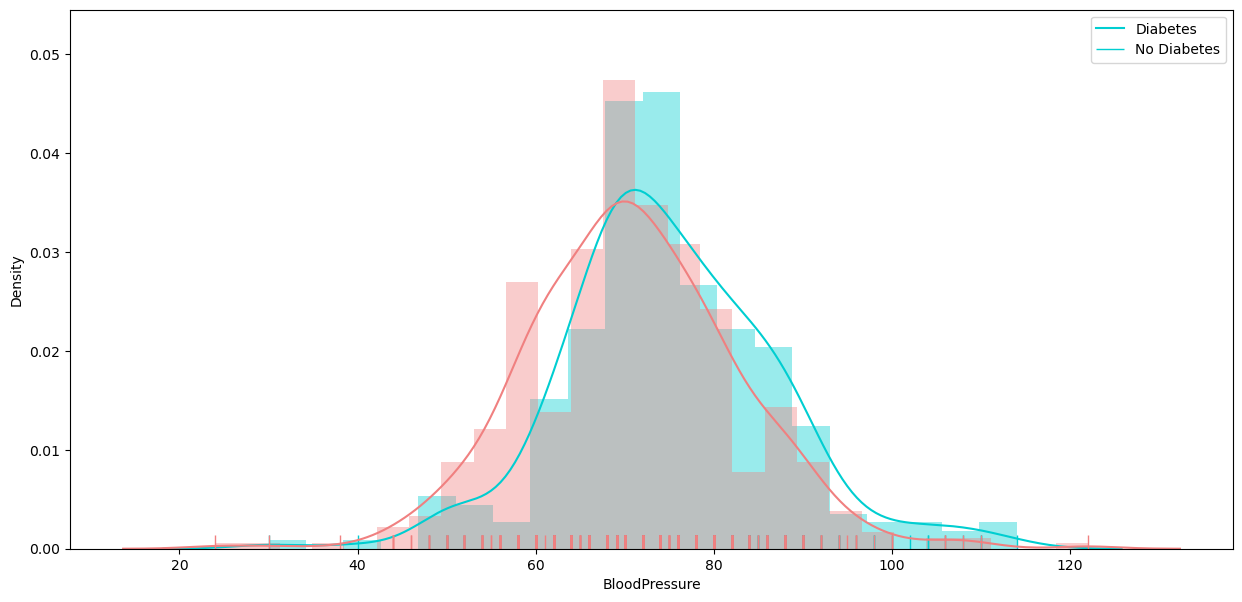

In [52]:
plt.figure()
ax = sns.distplot(df['BloodPressure'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['BloodPressure'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

### 4) Distribution of Skin Thickness

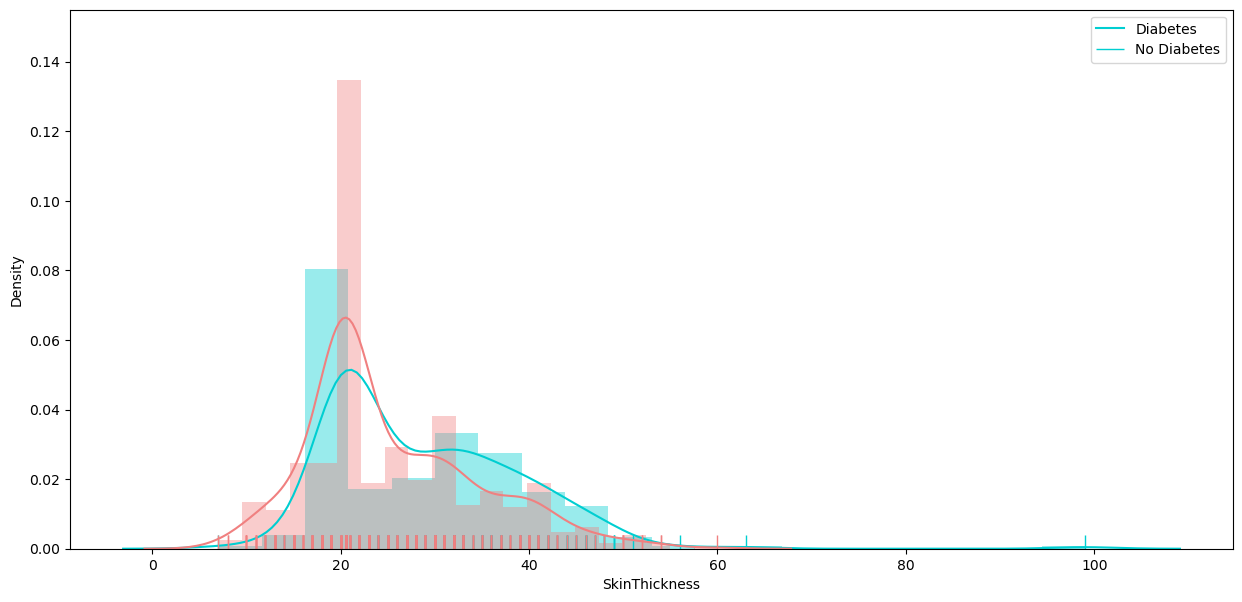

In [53]:
plt.figure()
ax = sns.distplot(df['SkinThickness'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['SkinThickness'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

### 5) Distribution of Insulin

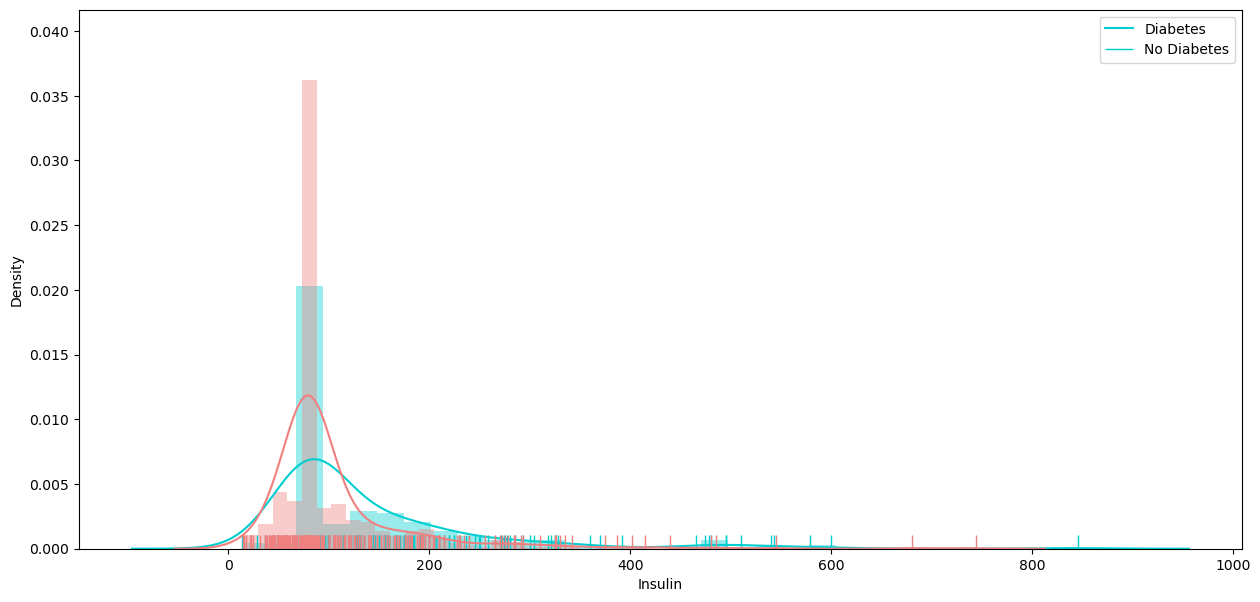

In [54]:
plt.figure()
ax = sns.distplot(df['Insulin'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['Insulin'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

### 6) Distribution of BMI

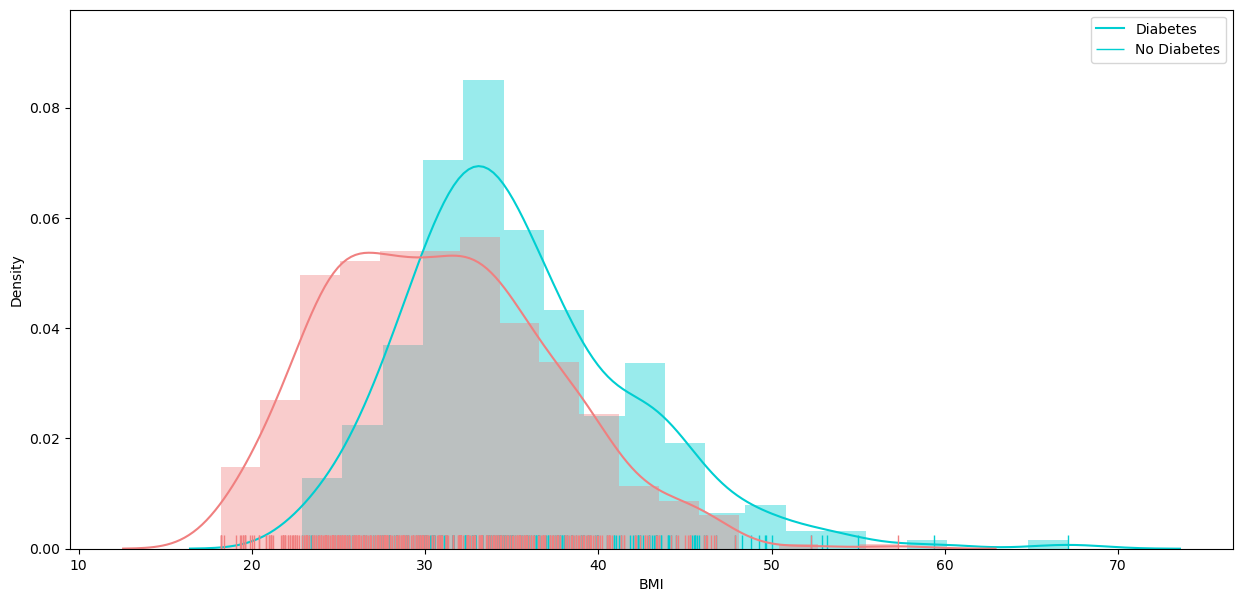

In [55]:
plt.figure()
ax = sns.distplot(df['BMI'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['BMI'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

### 7) Distribution of DiabetesPedigreeFunction

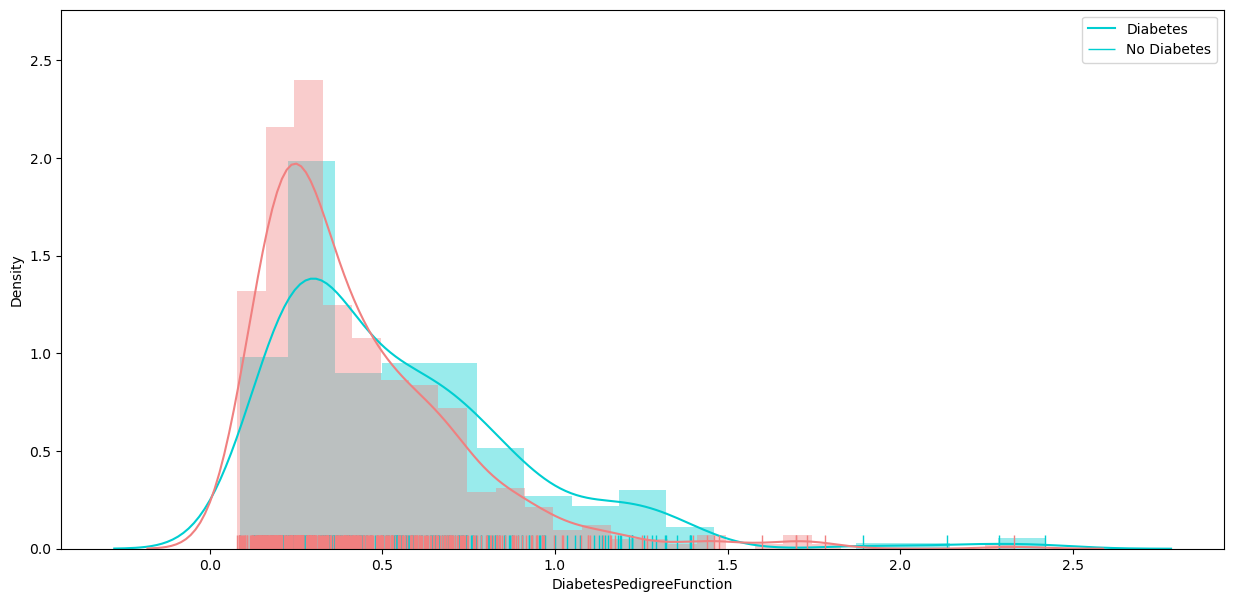

In [56]:
plt.figure()
ax = sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

### 8) Distribution of Age

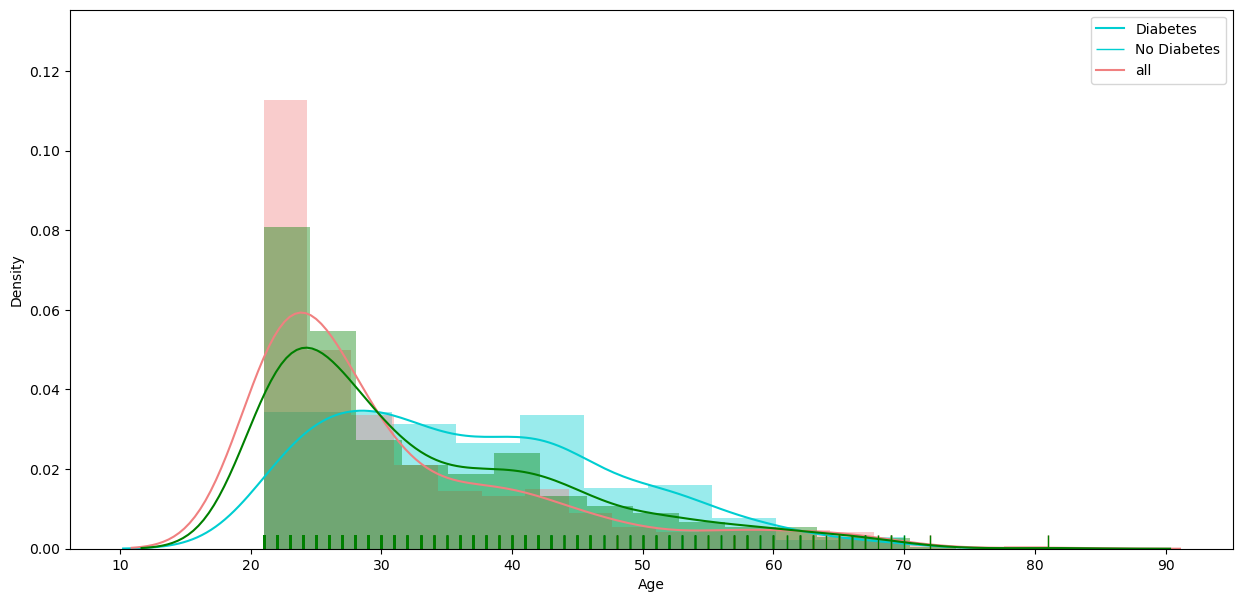

In [57]:
plt.figure()
ax = sns.distplot(df['Age'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['Age'][df.Outcome == 0], color ="lightcoral", rug=True)
sns.distplot(df['Age'], color ="green", rug=True)
plt.legend(['Diabetes', 'No Diabetes', 'all'])

### Splitting the Dataframe into X and Y

In [58]:
target_name = 'Outcome'

X = df.drop(target_name, axis = 1)
Y = df[target_name]

In [59]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [60]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [61]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54


In [62]:
Y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

### Applying Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

### Train Test Split

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(SSX,Y,test_size=0.2,random_state=7)

In [65]:
X_train.shape,Y_train.shape

((614, 8), (614,))

In [66]:
X_test.shape,Y_test.shape

((154, 8), (154,))

## Building the Classification Algorithms

### 1) Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

### 2) KNeighborsClassifier (KNN)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

### 3) Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

### 4) Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

### 5) Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

## Making Predictions on Test Set

### 1) Using Logistic Regression

In [72]:
X_test.shape

(154, 8)

In [73]:
lr_pred = lr.predict(X_test)

In [74]:
lr_pred.shape

(154,)

### 2) Using KNN

In [75]:
X_test.shape

(154, 8)

In [76]:
knn_pred = knn.predict(X_test)

In [77]:
knn_pred.shape

(154,)

### 3) Using Naive Bayes

In [78]:
X_test.shape

(154, 8)

In [79]:
nb_pred = nb.predict(X_test)

In [80]:
nb_pred.shape

(154,)

### 4) Using Decision Tree

In [81]:
X_test.shape

(154, 8)

In [82]:
dt_pred = dt.predict(X_test)

In [83]:
dt_pred.shape

(154,)

### 5) Using Random Forest

In [84]:
X_test.shape

(154, 8)

In [85]:
rf_pred = rf.predict(X_test)

In [86]:
rf_pred.shape

(154,)

## Model Evaluation

### Train Score & Test Score for

In [87]:
from sklearn.metrics import accuracy_score

### 1) Logistic Regression

In [88]:
print("\nTrain Accuracy of Logistic Regression: ", lr.score(X_train, Y_train)*100)
# print("\nAccuracy (Test) Score of Logistic Regression: ", lr.score(X_test, Y_test)*100)
print("\nAccuracy (Test) Score of Logistic Regression: ", accuracy_score(Y_test, lr_pred)*100)
print("\nMisclassification Score of Logistic Regression: ", (1-accuracy_score(Y_test, lr_pred))*100)


Train Accuracy of Logistic Regression:  77.36156351791531

Accuracy (Test) Score of Logistic Regression:  77.27272727272727

Misclassification Score of Logistic Regression:  22.72727272727273


### 2) KNeighborsClassifier (KNN)

In [89]:
print("\nTrain Accuracy of KNN: ", knn.score(X_train, Y_train)*100)
# print("\nAccuracy (Test) Score of KNN: ", knn.score(X_test, Y_test)*100)### 2) KNeighborsClassifier (KNN)
print("\nAccuracy (Test) Score of KNN: ", accuracy_score(Y_test, knn_pred)*100)
print("\nMisclassification Score of KNN: ", (1-accuracy_score(Y_test, knn_pred))*100)


Train Accuracy of KNN:  81.10749185667753

Accuracy (Test) Score of KNN:  74.67532467532467

Misclassification Score of KNN:  25.324675324675326


### 3) Naive Bayes

In [90]:
print("\nTrain Accuracy of Naive Bayes: ", nb.score(X_train, Y_train)*100)
# print("\nAccuracy (Test) Score of Naive Bayes: ", nb.score(X_test, Y_test)*100)
print("\nAccuracy (Test) Score of Naive Bayes: ", accuracy_score(Y_test, nb_pred)*100)
print("\nMisclassification Score of Naive Bayes: ", (1-accuracy_score(Y_test, nb_pred))*100)


Train Accuracy of Naive Bayes:  74.2671009771987

Accuracy (Test) Score of Naive Bayes:  74.02597402597402

Misclassification Score of Naive Bayes:  25.97402597402597


### 4) Decision Tree

In [91]:
print("\nTrain Accuracy of Decision Tree: ", dt.score(X_train, Y_train)*100)
# print("\nAccuracy (Test) Score of Decision Tree: ", dt.score(X_test, Y_test)*100)### 4) Decision Tree
print("\nAccuracy (Test) Score of Decision Tree: ", accuracy_score(Y_test, dt_pred)*100)
print("\nMisclassification Score of Decision Tree: ", (1-accuracy_score(Y_test, dt_pred))*100)


Train Accuracy of Decision Tree:  77.52442996742671

Accuracy (Test) Score of Decision Tree:  77.92207792207793

Misclassification Score of Decision Tree:  22.077922077922075


### 5) Random Forest

In [92]:
print("\nTrain Accuracy of Random Forest: ", rf.score(X_train, Y_train)*100)
# print("\nAccuracy (Test) Score of Random Forest: ", rf.score(X_test, Y_test)*100)
print("\n### 5) Random ForestAccuracy (Test) Score of Random Forest: ", accuracy_score(Y_test, rf_pred)*100)
print("\nMisclassification Score of Random Forest: ", (1-accuracy_score(Y_test, rf_pred))*100)


Train Accuracy of Random Forest:  78.50162866449512

### 5) Random ForestAccuracy (Test) Score of Random Forest:  75.32467532467533

Misclassification Score of Random Forest:  24.675324675324674


### Results for All Models

In [93]:
#storing the accuracies for all the 5 models in a dataframe

score_df=pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour', 'Naive Bayes',
                                 'Decision Tree','Random Forest'], 
                       'Train Accuracy': [lr.score(X_train, Y_train)*100, knn.score(X_train, Y_train)*100, nb.score(X_train, Y_train)*100, dt.score(X_train, Y_train)*100, rf.score(X_train, Y_train)*100],
                       'Accuracy (Test) Score': [accuracy_score(Y_test, lr_pred)*100, accuracy_score(Y_test, knn_pred)*100, accuracy_score(Y_test, nb_pred)*100, accuracy_score(Y_test, dt_pred)*100, accuracy_score(Y_test, rf_pred)*100],
                       'Misclassification Score': [(1-accuracy_score(Y_test, lr_pred))*100, (1-accuracy_score(Y_test, knn_pred))*100, (1-accuracy_score(Y_test, nb_pred))*100, (1-accuracy_score(Y_test, dt_pred))*100, (1-accuracy_score(Y_test, rf_pred))*100]})

score_df

,Model,Train Accuracy,Accuracy (Test) Score,Misclassification Score
0,Logistic Regression,77.361564,77.272727,22.727273
1,K-Nearest Neighbour,81.107492,74.675325,25.324675
2,Naive Bayes,74.267101,74.025974,25.974026
3,Decision Tree,77.524430,77.922078,22.077922
4,Random Forest,78.501629,75.324675,24.675325


## Confusion Matrix

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

### For Logistic Regression

In [95]:
cm = confusion_matrix(Y_test, lr_pred)
cm

array([[86, 11],
       [24, 33]], dtype=int64)

<Axes: >

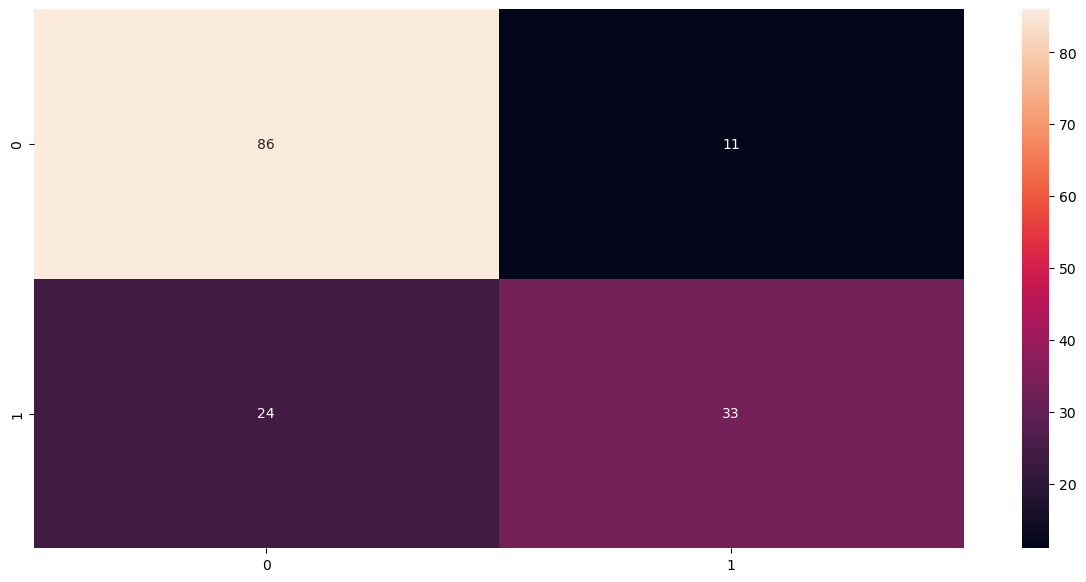

In [96]:
sns.heatmap(cm, annot=True, fmt='d')

In [97]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [98]:
TN, FP, FN, TP

(86, 11, 24, 33)

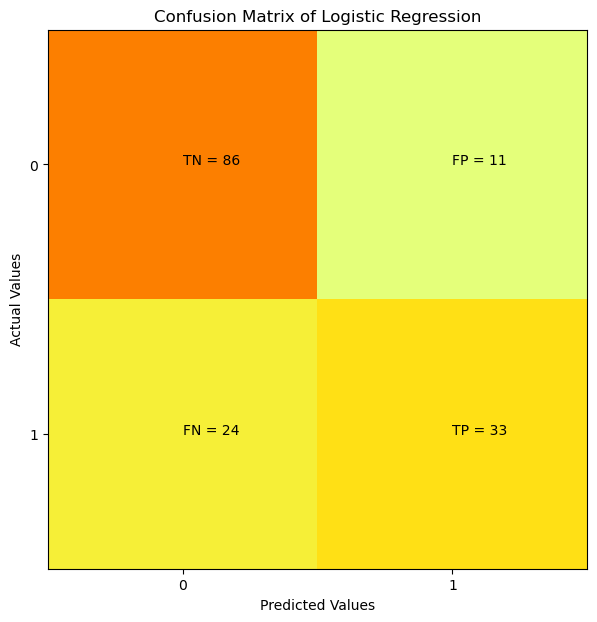

In [99]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [100]:
pd.crosstab(Y_test, lr_pred, rownames=['Actual Values'], colnames=['Predicted Values'], margins=True)

Predicted Values,0,1,All
Actual Values,,,
0,86,11,97
1,24,33,57
All,110,44,154


### Classification Report of Logistic Regression

In [101]:
print("Classification Report of Logistic Regression: \n\n", classification_report(Y_test, lr_pred, digits = 4))

Classification Report of Logistic Regression: 

               precision    recall  f1-score   support

           0     0.7818    0.8866    0.8309        97
           1     0.7500    0.5789    0.6535        57

    accuracy                         0.7727       154
   macro avg     0.7659    0.7328    0.7422       154
weighted avg     0.7700    0.7727    0.7652       154



### True Positive Rate

In [102]:
tpr = round((TP / (TP + FN)) * 100, 3)
tpr

57.895

### False Positive Rate

In [103]:
fpr = round((FP / (FP + TN)) * 100, 3)
fpr

11.34

### ROC AUC Score for Logistic Regression

In [104]:
auc = round(roc_auc_score(Y_test, lr_pred) * 100, 3)
print("ROC AUC Score for Logistic Regression is: ", auc)

ROC AUC Score for Logistic Regression is:  73.277


### ROC Curve for Logistic Regression

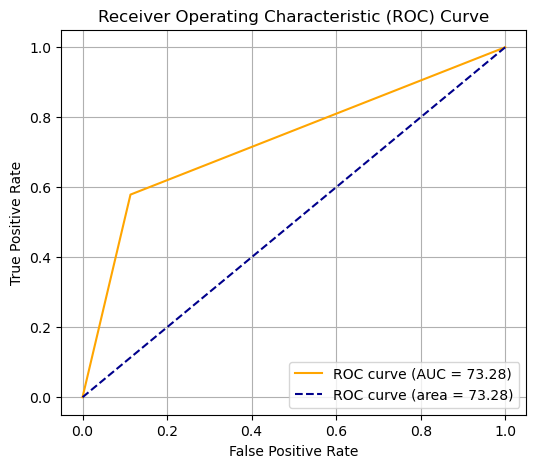

In [105]:
fpr, tpr, thresholds = roc_curve(Y_test, lr_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color = 'orange', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label='ROC curve (area = %0.2f)' % auc)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### For KNN

In [106]:
cm = confusion_matrix(Y_test, knn_pred)
cm

array([[82, 15],
       [24, 33]], dtype=int64)

<Axes: >

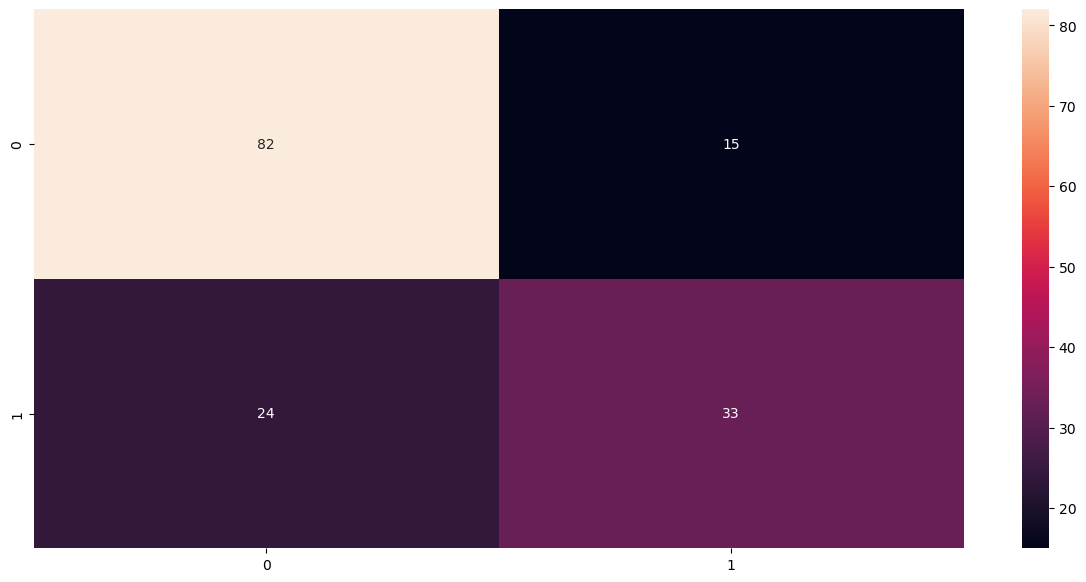

In [107]:
sns.heatmap(cm, annot=True, fmt='d')

In [108]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [109]:
TN, FP, FN, TP

(82, 15, 24, 33)

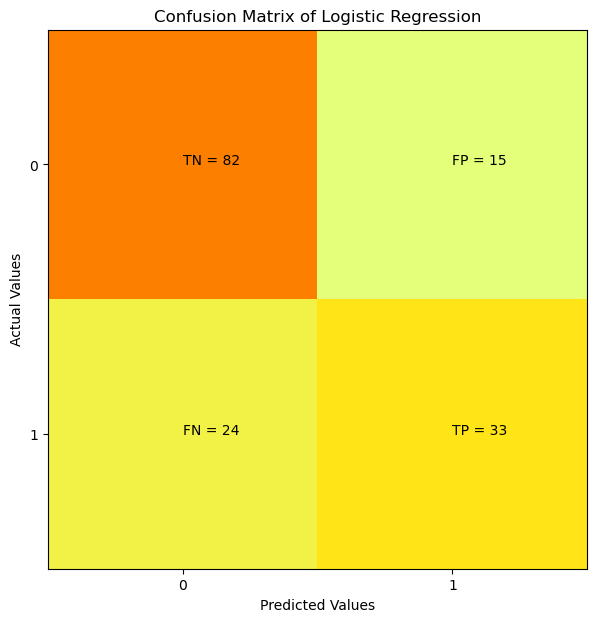

In [110]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [111]:
pd.crosstab(Y_test, knn_pred, rownames=['Actual Values'], colnames=['Predicted Values'], margins=True)

Predicted Values,0,1,All
Actual Values,,,
0,82,15,97
1,24,33,57
All,106,48,154


### Classification Report of KNN

In [112]:
print("Classification Report of KNN: \n\n", classification_report(Y_test, knn_pred, digits = 4))

Classification Report of KNN: 

               precision    recall  f1-score   support

           0     0.7736    0.8454    0.8079        97
           1     0.6875    0.5789    0.6286        57

    accuracy                         0.7468       154
   macro avg     0.7305    0.7122    0.7182       154
weighted avg     0.7417    0.7468    0.7415       154



### True Positive Rate

In [113]:
tpr = round((TP / (TP + FN)) * 100, 3)
tpr

57.895

### False Positive Rate

In [114]:
fpr = round((FP / (FP + TN)) * 100, 3)
fpr

15.464

### ROC AUC Score for KNN

In [115]:
auc = round(roc_auc_score(Y_test, knn_pred)*100, 3)
print("ROC AUC Score for KNN is: ", auc)

ROC AUC Score for KNN is:  71.215


### ROC Curve for KNN

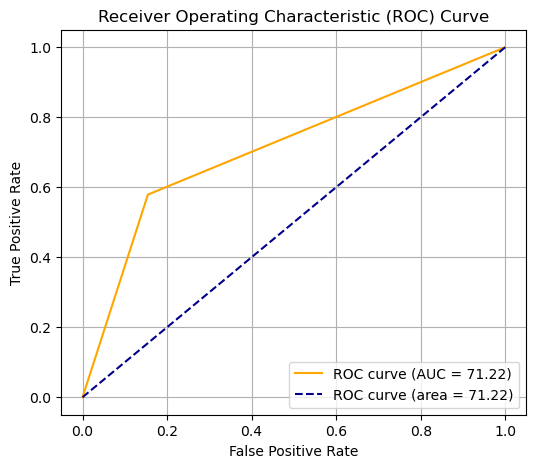

In [116]:
fpr, tpr, thresholds = roc_curve(Y_test, knn_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color = 'orange', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label='ROC curve (area = %0.2f)' % auc)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### For Naive Bayes

In [117]:
cm = confusion_matrix(Y_test, nb_pred)
cm

array([[78, 19],
       [21, 36]], dtype=int64)

<Axes: >

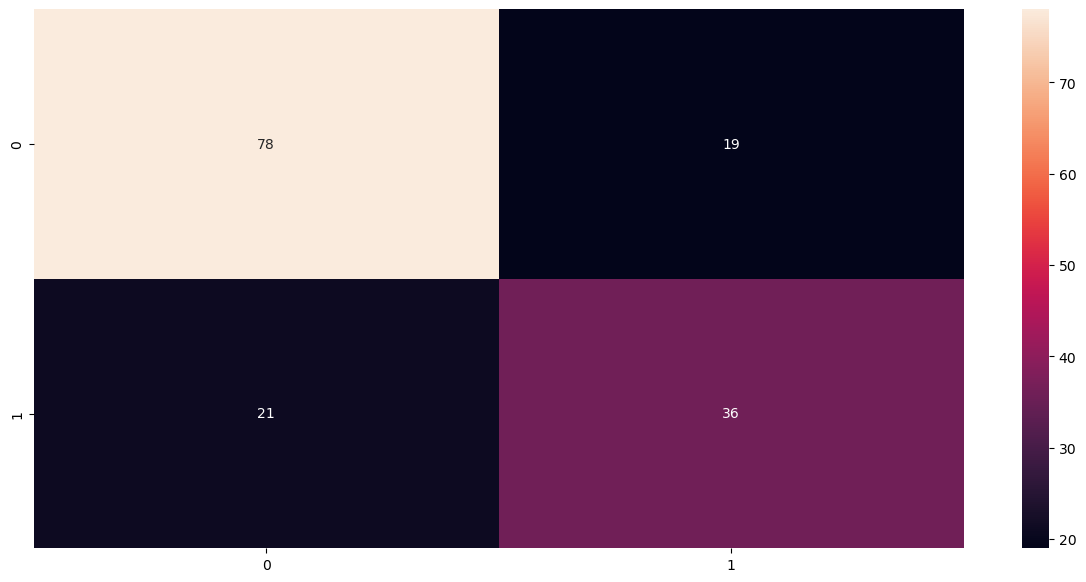

In [118]:
sns.heatmap(cm, annot=True, fmt='d')

In [119]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [120]:
TN, FP, FN, TP

(78, 19, 21, 36)

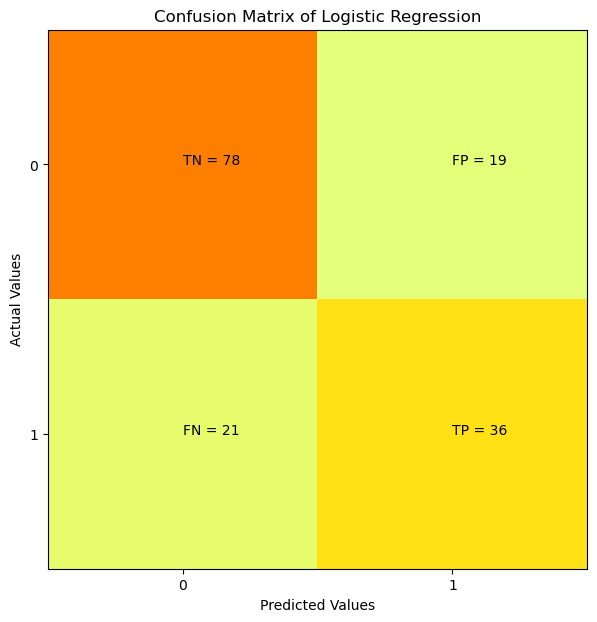

In [121]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [122]:
pd.crosstab(Y_test, nb_pred, rownames=['Actual Values'], colnames=['Predicted Values'], margins=True)

Predicted Values,0,1,All
Actual Values,,,
0,78,19,97
1,21,36,57
All,99,55,154


### Classification Report of Naive Bayes

In [123]:
print("Classification Report of Naive Bayes: \n\n", classification_report(Y_test, nb_pred, digits = 4))

Classification Report of Naive Bayes: 

               precision    recall  f1-score   support

           0     0.7879    0.8041    0.7959        97
           1     0.6545    0.6316    0.6429        57

    accuracy                         0.7403       154
   macro avg     0.7212    0.7179    0.7194       154
weighted avg     0.7385    0.7403    0.7393       154



### True Positive Rate

In [124]:
tpr = round((TP / (TP + FN)) * 100, 3)
tpr

63.158

### False Positive Rate

In [125]:
fpr = round((FP / (FP + TN)) * 100, 3)
fpr

19.588

### ROC AUC Score for Naive Bayes

In [126]:
auc = round(roc_auc_score(Y_test, nb_pred) * 100, 3)
print("ROC AUC Score for Naive Bayes is: ", auc)

ROC AUC Score for Naive Bayes is:  71.785


### ROC Curve for Naive Bayes

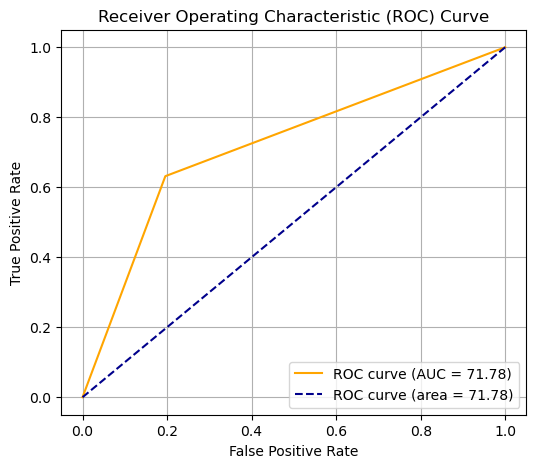

In [127]:
fpr, tpr, thresholds = roc_curve(Y_test, nb_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color = 'orange', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label='ROC curve (area = %0.2f)' % auc)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### For Decision Tree

In [128]:
cm = confusion_matrix(Y_test, dt_pred)
cm

array([[85, 12],
       [22, 35]], dtype=int64)

<Axes: >

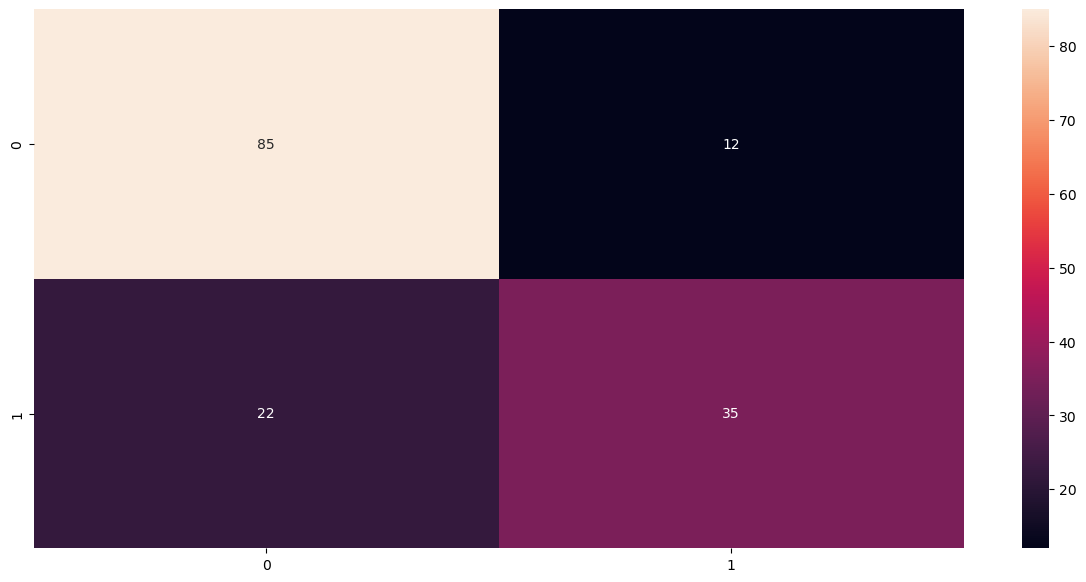

In [129]:
sns.heatmap(cm, annot=True, fmt='d')

In [130]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [131]:
TN, FP, FN, TP

(85, 12, 22, 35)

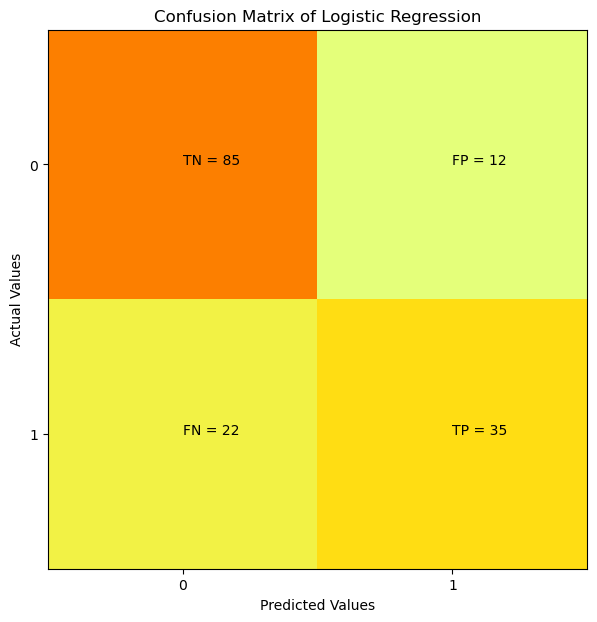

In [132]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [133]:
pd.crosstab(Y_test, dt_pred, rownames=['Actual Values'], colnames=['Predicted Values'], margins=True)

Predicted Values,0,1,All
Actual Values,,,
0,85,12,97
1,22,35,57
All,107,47,154


### Classification Report of Decision Tree

In [134]:
print("Classification Report of Decision Tree: \n\n", classification_report(Y_test, dt_pred, digits = 4))

Classification Report of Decision Tree: 

               precision    recall  f1-score   support

           0     0.7944    0.8763    0.8333        97
           1     0.7447    0.6140    0.6731        57

    accuracy                         0.7792       154
   macro avg     0.7695    0.7452    0.7532       154
weighted avg     0.7760    0.7792    0.7740       154



### True Positive Rate

In [135]:
tpr = round((TP / (TP + FN)) * 100, 3)
tpr

61.404

### False Positive Rate

In [136]:
fpr = round((FP / (FP + TN)) * 100, 3)
fpr

12.371

### ROC AUC Score for Decision Tree

In [137]:
auc = round(roc_auc_score(Y_test, dt_pred) * 100, 3)
print("ROC AUC Score for Decision Tree is: ", auc)

ROC AUC Score for Decision Tree is:  74.516


### ROC Curve for Decision Tree

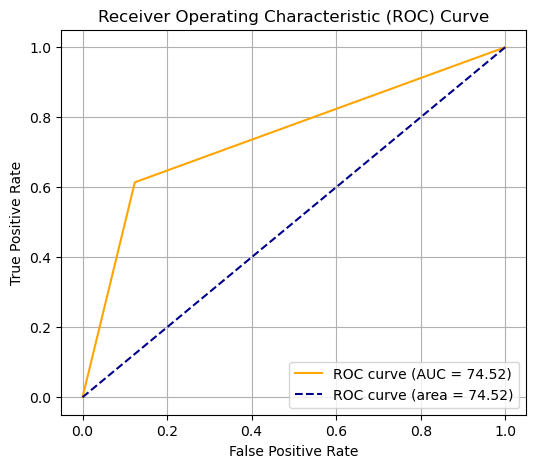

In [138]:
fpr, tpr, thresholds = roc_curve(Y_test, dt_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color = 'orange', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label='ROC curve (area = %0.2f)' % auc)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### For Random Forest

In [139]:
cm = confusion_matrix(Y_test, rf_pred)
cm

array([[89,  8],
       [30, 27]], dtype=int64)

<Axes: >

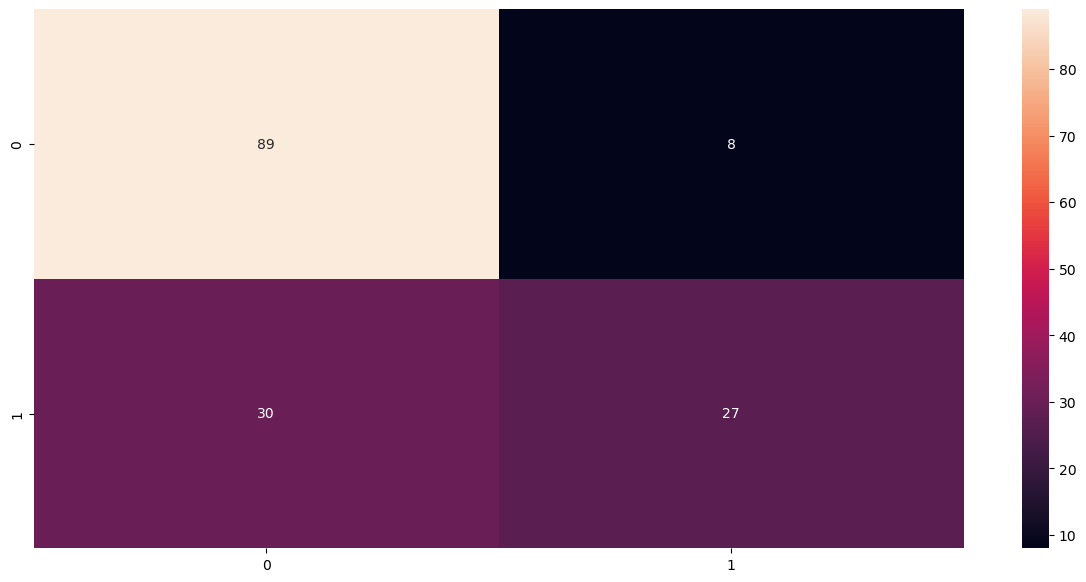

In [140]:
sns.heatmap(cm, annot=True, fmt='d')

In [141]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [142]:
TN, FP, FN, TP

(89, 8, 30, 27)

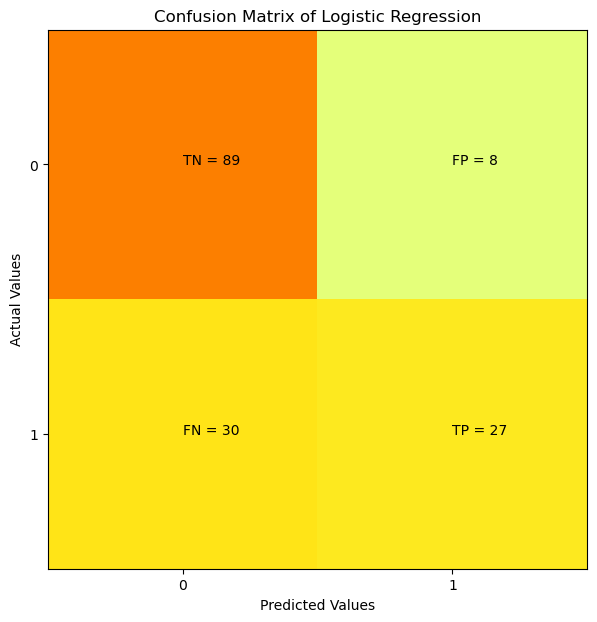

In [143]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [144]:
pd.crosstab(Y_test, rf_pred, rownames=['Actual Values'], colnames=['Predicted Values'], margins=True)

Predicted Values,0,1,All
Actual Values,,,
0,89,8,97
1,30,27,57
All,119,35,154


### Classification Report of Random Forest

In [145]:
print("Classification Report of Random Forest: \n\n", classification_report(Y_test, rf_pred, digits = 4))

Classification Report of Random Forest: 

               precision    recall  f1-score   support

           0     0.7479    0.9175    0.8241        97
           1     0.7714    0.4737    0.5870        57

    accuracy                         0.7532       154
   macro avg     0.7597    0.6956    0.7055       154
weighted avg     0.7566    0.7532    0.7363       154



### True Positive Rate

In [146]:
tpr = round((TP / (TP + FN)) * 100, 3)
tpr

47.368

### False Positive Rate

In [147]:
fpr = round((FP / (FP + TN)) * 100, 3)
fpr

8.247

### ROC AUC Score for Random Forest

In [148]:
auc = round(roc_auc_score(Y_test, rf_pred) * 100, 3)
print("ROC AUC Score for Random Forest is: ", auc)

ROC AUC Score for Random Forest is:  69.56


### ROC Curve for Random Forest

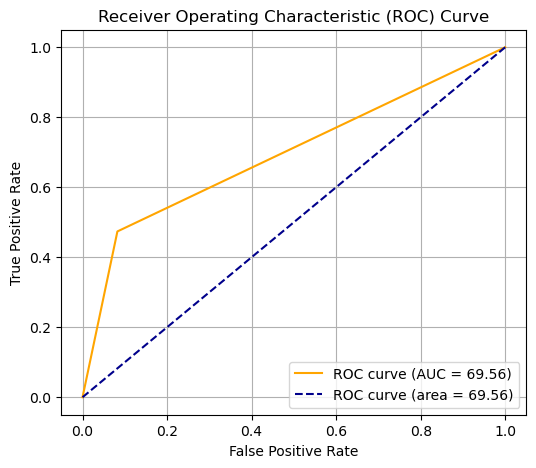

In [149]:
fpr, tpr, thresholds = roc_curve(Y_test, rf_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color = 'orange', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label='ROC curve (area = %0.2f)' % auc)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Testing models on a new data set

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [151]:
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

In [152]:
lgr = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth=3)
rfc = RandomForestClassifier(max_depth=3)

In [153]:
lgr.fit(X,Y)

LogisticRegression()

In [154]:
dtc.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

In [155]:
rfc.fit(X,Y)

RandomForestClassifier(max_depth=3)

In [156]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [157]:
new_data_1 = pd.DataFrame({'Pregnancies':6, 'Glucose':148.0, 'BloodPressure':72.0, 'SkinThickness':35.0, 'Insulin':79.799479,
       'BMI':33.6, 'DiabetesPedigreeFunction':0.627, 'Age':50}, index=[0])

new_data_2 = pd.DataFrame({'Pregnancies':8, 'Glucose':120.0, 'BloodPressure':60.0, 'SkinThickness':40.0, 'Insulin':73.536928,
       'BMI':22.7, 'DiabetesPedigreeFunction':0.535, 'Age':29}, index=[0])

new_data_3 = pd.DataFrame({'Pregnancies':10, 'Glucose':135.0, 'BloodPressure':68.0, 'SkinThickness':50.0, 'Insulin':67.928534,
       'BMI':39.8, 'DiabetesPedigreeFunction':0.471, 'Age':37}, index=[0])

In [158]:
x = lgr.predict(new_data_1)
y = dt.predict(new_data_2)
z = rfc.predict(new_data_3)

In [159]:
if x[0] == 0:
    print("The patient is \'Diabetic\'")
else:
    print("The patient is \'Non-Diabetic\'")

The patient is 'Non-Diabetic'


In [160]:
if y[0] == 0:
    print("The patient is \'Diabetic\'")
else:
    print("The patient is \'Non-Diabetic\'")

The patient is 'Non-Diabetic'


In [161]:
if z[0] == 0:
    print("The patient is \'Diabetic\'")
else:
    print("The patient is \'Non-Diabetic\'")

The patient is 'Diabetic'


## Conclusions

In [162]:
score_df

,Model,Train Accuracy,Accuracy (Test) Score,Misclassification Score
0,Logistic Regression,77.361564,77.272727,22.727273
1,K-Nearest Neighbour,81.107492,74.675325,25.324675
2,Naive Bayes,74.267101,74.025974,25.974026
3,Decision Tree,77.524430,77.922078,22.077922
4,Random Forest,78.501629,75.324675,24.675325


Based on the Train Score from the above given table, we can conclude that out of all the 5 models, the best model for training is K-Nearest Neighbour, followed by Random Forest & Decision Tree.

However, based on the Test Scores from the above given table, we conclude that out of all the 5 models, the best model for the given classification task is Decision Tree, followed by Logistic Regression and Random Forest.